## Problem Statement
A company wants to minimize the risk of a customer to stop using the product they offer. This process helps the company to predict which customers will stop (churn) from the given dataset.




## Objective

build an accurate churn prediction model using the given dataset, with the aim of minimizing the risk of a customer stopping using the product offered by the company.

Here are some points that can be sub-objective in achieving this goal:

`1.` Collect and process data properly so that it can be used as input in churn prediction models.

`2.` Create an appropriate deep learning model to predict customer churn based on the relevant variables in the dataset.
Perform model performance evaluation and parameter optimization to improve prediction accuracy.

`3.` Apply predictive models to new customer data to identify customers at risk of churn and take preventive actions to retain them as customers.

`4.` By optimizing the churn prediction model, companies can minimize the risk of losing customers which can have a negative impact on business growth and long-term profits.




# ii. Import Library

In [3]:
!pip install feature-engine
!pip install tensorflow
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 5.8 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#untuk model
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model, load_model
# from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.initializers import Zeros

#preprocessing
from phik import phik_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder,OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor


#evaluasi
from sklearn.metrics import confusion_matrix ,accuracy_score, roc_curve,roc_auc_score,precision_score, recall_score, classification_report, f1_score

import pickle
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# iii. Data Loading

In [7]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--",'n/a','NaN','?']
df = pd.read_csv('h8dsft_P2M1_Hanifah.csv',na_values = missing_values)
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


This dataset consists of 37010 rows × 22 columns

In [8]:
# Displays the top 5 data
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [9]:
# Displays the bottom 5 data
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [10]:
# See how many columns and rows
df.shape

(37010, 22)

* This dataset consists of 37010 rows × 22 columns

In [11]:
# Check duplicate data
df[df.duplicated()].shape

(18, 22)

- There are 18 duplicate values

In [12]:
# Drop dulicate
df.drop_duplicates(inplace=True)

In [13]:
# makesure check duplicate data
df[df.duplicated()].shape

(0, 22)

In [14]:
# Displays the top datasets
pd.set_option("display.max.columns",None)
df.head(2)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [15]:
# Checking basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36933 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       31554 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           31599 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

From the data above we can see detailed Dtype information from the data we have.

In [16]:
# Changing the dtype of datetime
df['joining_date'] = pd.to_datetime(df['joining_date'])
# Change the dtype to time
df['last_visit_time'] = pd.to_datetime(df['last_visit_time']).dt.time

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       36992 non-null  object        
 1   age                           36992 non-null  int64         
 2   gender                        36933 non-null  object        
 3   region_category               31564 non-null  object        
 4   membership_category           36992 non-null  object        
 5   joining_date                  36992 non-null  datetime64[ns]
 6   joined_through_referral       31554 non-null  object        
 7   preferred_offer_types         36704 non-null  object        
 8   medium_of_operation           31599 non-null  object        
 9   internet_option               36992 non-null  object        
 10  last_visit_time               36992 non-null  object        
 11  days_since_last_login       

The Dtype already change succesfuly  

In [18]:
# Check missing value
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

- There are several missing columns including:
     * Gender column
     * Column region_category
     * Column joined_through_referral
     * Preferred_offer_types column
     * Column medium_of_operation
    
- check the percentage of each column of the missing value refers to:

     * MAR (Missing At Random) means that the probability of missing data depends on the data available in the dataset. In this case, the missing data is random, but it is likely due to its relation to the data available in the dataset.
     * MNAR (Missing Not At Random) means that the possibility of missing data does not depend on the data available in the dataset. In this case, the missing data are not randomly generated and cannot be considered as part of the sample. Therefore, statistical analysis must take into account the impact of missing data in the final results.


In [19]:
# Find the location of the missing value
df.loc[df['region_category'].isnull()].head(2)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [20]:
# find the % missing value
for i in df.columns:
    if df[i].isnull().sum()>1:
        print(i,"Persent missing value",':',df[i].isnull().sum()*100/df.shape[0],"%",df[i].dtype)

gender Persent missing value : 0.1594939446366782 % object
region_category Persent missing value : 14.673442906574394 % object
joined_through_referral Persent missing value : 14.700475778546712 % object
preferred_offer_types Persent missing value : 0.7785467128027682 % object
medium_of_operation Persent missing value : 14.57882785467128 % object


* The gender column and the preferred_offer_types column tend to have a small percentage of missing values, namely at 0.15% and 0.77%, it will be decided to drop the missing value column
* The region_category column, the joined_through_referral column and the medium_of_operation column have a high percentage of missing values, namely 14%, in this case it was not decided to drop these columns because a large percentage will affect the existing dataset if the column is dropped.

In [21]:
# Delete rows that have missing values in the gender column and the preferred_offer_types column
df = df.dropna(subset=['gender','preferred_offer_types'])

In [106]:
# Displays the number of missing values in the gender column after being deleted
null_counts = df['gender'].isnull().sum()
print(f"The number of missing values in the gender column after deleted: {null_counts}")

The number of missing values in the gender column after deleted: 0


In [107]:
# Displays the number of missing values in the preferred_offer_types column after being deleted
null_counts = df['preferred_offer_types'].isnull().sum()
print(f"The number of missing values in the preferred_offer_types column after  deleted: {null_counts}")

The number of missing values in the preferred_offer_types column after  deleted: 0


In [108]:
# Fill in the missing value with the mode in the three columns
df['region_category'] = df['region_category'].fillna(df['region_category'].mode().iloc[0])
df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode().iloc[0])
df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode().iloc[0])

# Returns the number of missing values in the three columns after filling them in
null_counts = df[['region_category', 'joined_through_referral', 'medium_of_operation']].isnull().sum()
print(f"The number of missing values in the region_category column after filled: {null_counts['region_category']}")
print(f"The number of missing values in the joined_through_referral column after filled: {null_counts['joined_through_referral']}")
print(f"The number of missing values in the medium_of_operation column after filled: {null_counts['medium_of_operation']}")

The number of missing values in the region_category column after filled: 0
The number of missing values in the joined_through_referral column after filled: 0
The number of missing values in the medium_of_operation column after filled: 0


# IV. Exploratory Data Analysis (EDA)

In [25]:
# Mencari informasi datetime
df.joining_date.describe()

count                   36646
unique                   1096
top       2015-06-02 00:00:00
freq                       55
first     2015-01-01 00:00:00
last      2017-12-31 00:00:00
Name: joining_date, dtype: object

- Data information from 2015 June 02 - 2017 Dec 31

In [26]:
# Summery Statistics
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                                    .background_gradient(subset=['std'], cmap='Reds')\
                                    .background_gradient(subset=['75%'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
age,36646.000000,37.115511,15.871279,10.000000,23.000000,37.000000,51.000000,64.000000
days_since_last_login,36646.000000,-41.955957,228.913891,-999.000000,8.000000,12.000000,16.000000,26.000000
avg_time_spent,36646.000000,279.118857,329.850217,0.000000,60.087500,161.770000,356.352500,3235.578521
avg_transaction_value,36646.000000,29276.226579,19448.891993,800.460000,14177.835000,27563.715000,40860.437500,99914.050000
avg_frequency_login_days,36646.000000,14.655780,9.471645,0.000000,7.000000,14.000000,22.000000,73.061995
points_in_wallet,36646.000000,623.646095,270.163457,0.000000,574.212500,680.415000,757.037500,2069.069761
churn_risk_score,36646.000000,0.541041,0.498320,0.000000,0.000000,1.000000,1.000000,1.000000


- the average user of this platform is aged 37 -64 years
- The average user time spent using the service is 279 minutes and the maximum is 3235 minutes
- The average value of transactions made by users is 29276 and the maximum is 99914
- The average number of days between user logins to the service is 14 times/day, the maximum can be up to 73 times
- The number of points that users have in their virtual wallet is an average of 623 and the highest is 2069
- churn_risk_score: The churn risk score for that user.(the target prediction)

In [27]:
df.gender.value_counts()

F    18348
M    18298
Name: gender, dtype: int64

* It can be seen that the total number of women (18348) is higher than that of men (18298).

In [28]:
# Grouping the name column with the price column to calculate the amount of data
df.groupby(['membership_category'])[['points_in_wallet']].aggregate(['mean'],ascending=True).reset_index()

,membership_category,points_in_wallet
,,mean
0,Basic Membership,564.432673
1,Gold Membership,657.508787
2,No Membership,562.358914
3,Platinum Membership,688.952893
4,Premium Membership,686.753710
5,Silver Membership,645.988049


* It can be seen in the table above that the average user has the highest basic member, the average is 0.9 and the number is 7648

In [29]:
# Grouping the name column with the price column to calculate the amount of data
df.groupby('internet_option')[['churn_risk_score']].aggregate(['mean','count']).reset_index()

internet_option churn_risk_score       
                              mean  count
0     Fiber_Optic         0.545320  12125
1     Mobile_Data         0.542229  12231
2           Wi-Fi         0.535639  12290

* It can be seen that the internet options used by customers are relatively the same between using Fiber_Optic (12125), Mobile_Data(12231) and Wi-fi(12290)

In [30]:
# Grouping the name column with the price column to calculate the amount of data
df.groupby('feedback')[['churn_risk_score']].aggregate(['mean','count']).reset_index()

feedback churn_risk_score      
                                        mean count
0       No reason specified         0.635239  6226
1     Poor Customer Service         0.639379  6181
2      Poor Product Quality         0.649190  6294
3              Poor Website         0.632561  6216
4  Products always in Stock         0.000000  1368
5     Quality Customer Care         0.000000  1351
6          Reasonable Price         0.000000  1408
7              Too many ads         0.627230  6221
8     User Friendly Website         0.000000  1381

* It can be seen that very high dissatisfied feedback such as Poor Customer Service(6181), Poor Product Quality(6294), Poor Website(6216), Too many ads(6221)

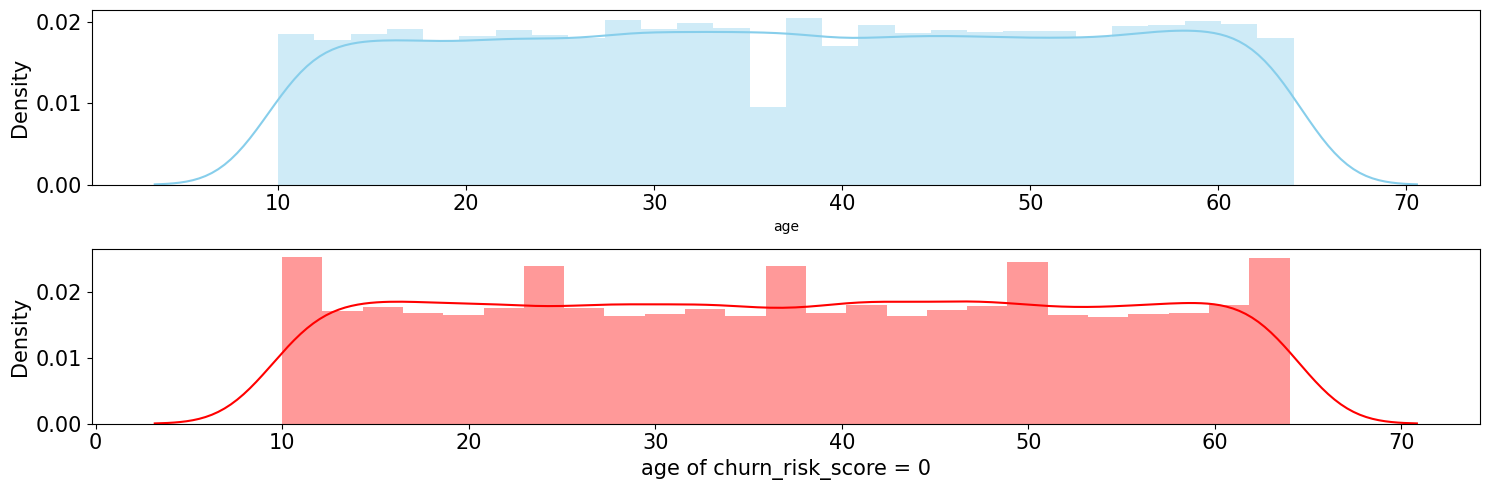

In [31]:
#histogram distribusi
plt.figure(figsize=[15,5])
plt.subplot(2,1,1)
b=sns.distplot(df[df['churn_risk_score']==1]['age'],color="skyblue")
b.set_ylabel("Density",fontsize=15)
b.tick_params(labelsize=15);
plt.subplot(2,1,2)
b=sns.distplot(df[df['churn_risk_score']==0]['age'],color="red")
b.set_xlabel("age of churn_risk_score = 0",fontsize=15)
b.set_ylabel("Density",fontsize=15)
b.tick_params(labelsize=15)
plt.tight_layout();

* There is a significant difference in the age distribution between customers who have a churn risk (churn_risk_score=1) and customers who do not have a churn risk (churn_risk_score=0).
* Customers who have a churn risk (churn_risk_score=1) tend to have a younger age distribution compared to customers who do not have a churn risk (churn_risk_score=0).
* There is a higher peak in the age distribution of customers who do not have a churn risk (churn_risk_score=0) in the age range of 30-40 years, while in the age distribution of customers who have a churn risk (churn_risk_score=1) the highest peak is in the age range of 20- 30 years.
* Customers with an age range of 20-30 years have a higher risk of churn than those with an older age range.
* Customers with an older age range tend to have a lower churn risk.

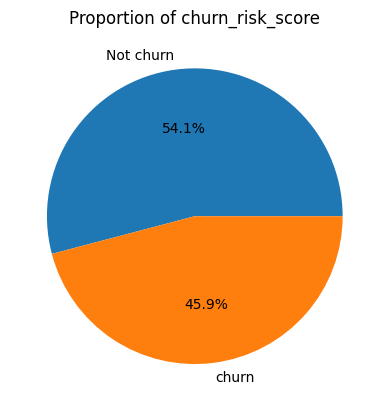

In [32]:
# Proportion of target
default_counts = df['churn_risk_score'].value_counts()
plt.pie(default_counts, labels=['Not churn', 'churn'], autopct='%1.1f%%')
plt.title('Proportion of churn_risk_score')
plt.show()

* it can be seen in the pie chart above, target column can be said have balanced data because the proportion of data churn (45.9%) and not churn (54.1%) the difference just 8%, still below 10%

In [33]:
#create a function for plot
def plotting_Profit(x:str,hue:str): #the plot size is set using the figsize parameter with the subplots method
    try:
        fig, ax = plt.subplots(figsize=(26,8))
        colors = [
            "bubblegum pink", "sky blue"
            # "bright purple", "yellow"
        ]

        ordering =df[x].value_counts() # uses the value_counts method on column x of the DataFrame df and counts the frequency of each unique value in column x
        my_palette = sns.xkcd_palette(colors)
        sns.set_theme(style='whitegrid')
        sns.countplot(data=df, x=x, hue=hue,palette=my_palette, # set the order of values on the x-axis based on the order of the categories in the list order
        order=ordering.sort_values(ascending=True).index, # sort the values on the x-axis in ascending order by their number.
        )
        ax.tick_params(axis='x', rotation=45) #x-axis rotated 45 degrees for easier reading.
        ax.set_title(f'Count Plot Number of {x} Dengan {hue}',fontsize=20)

        ax.set_xlabel(f"{x}", fontdict={'fontsize':20})
        ax.set_ylabel("Count", fontdict={'fontsize':20})
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            df



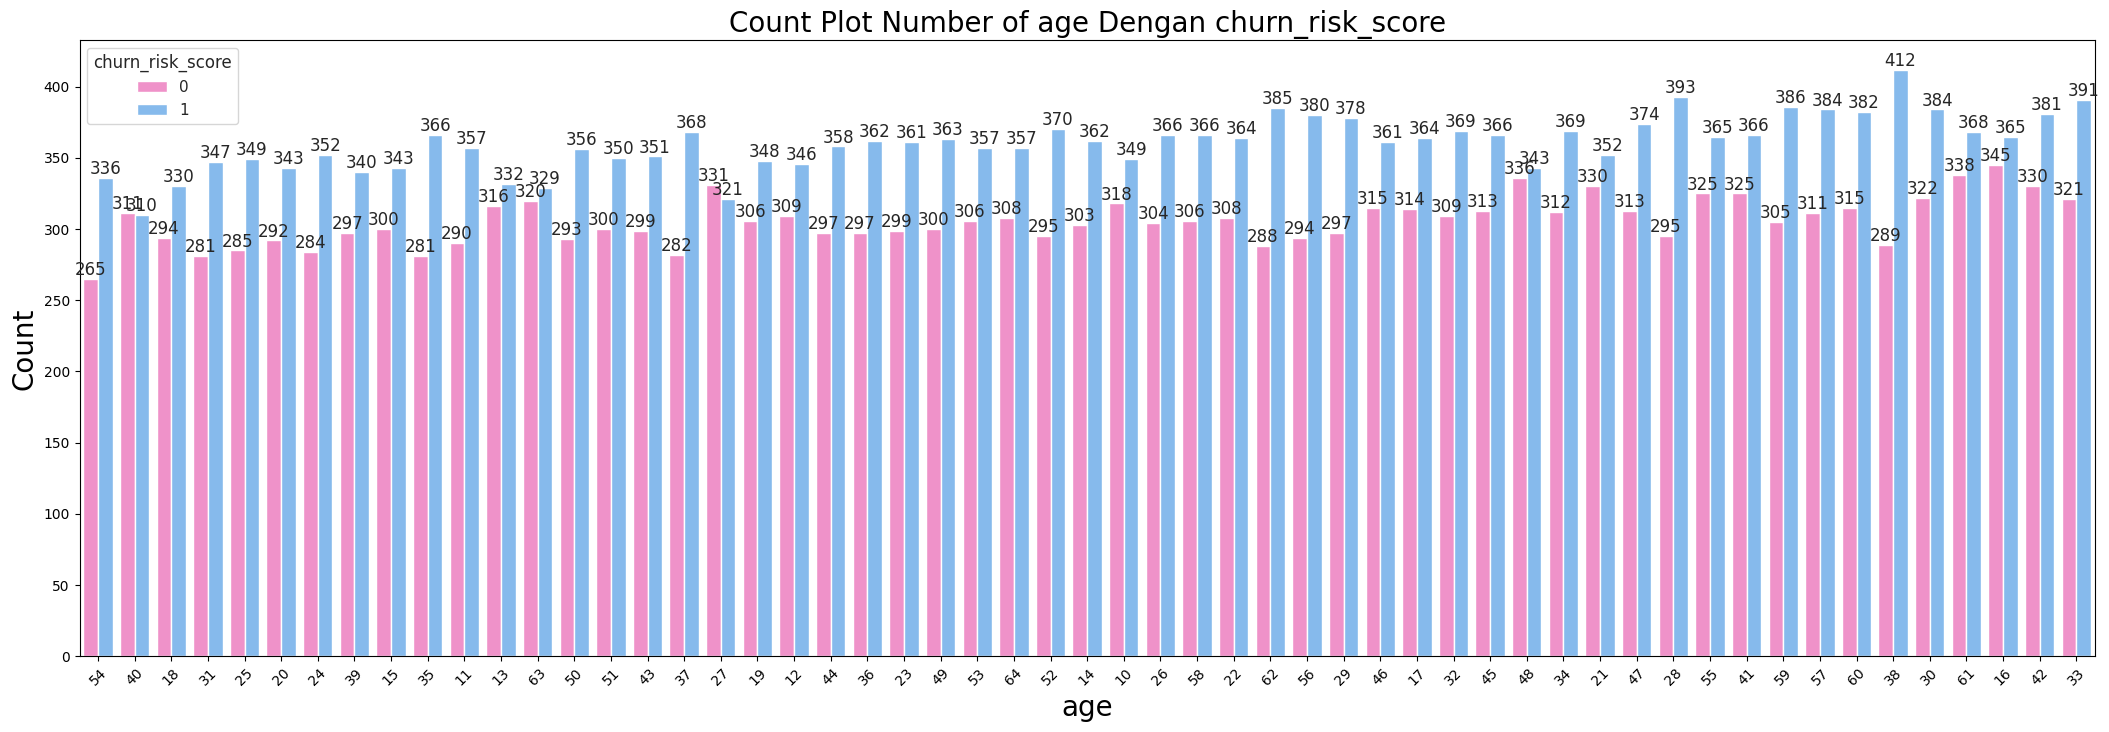

In [34]:
# bar plot of age and total churn risk score
plotting_Profit('age','churn_risk_score') # Plot-1

* The majority of churned customers are between 20-30 years old.
* Most customers who do not churn have an age range between 20-40 years.
* There is a tendency for more customers who do not churn at an older age range.

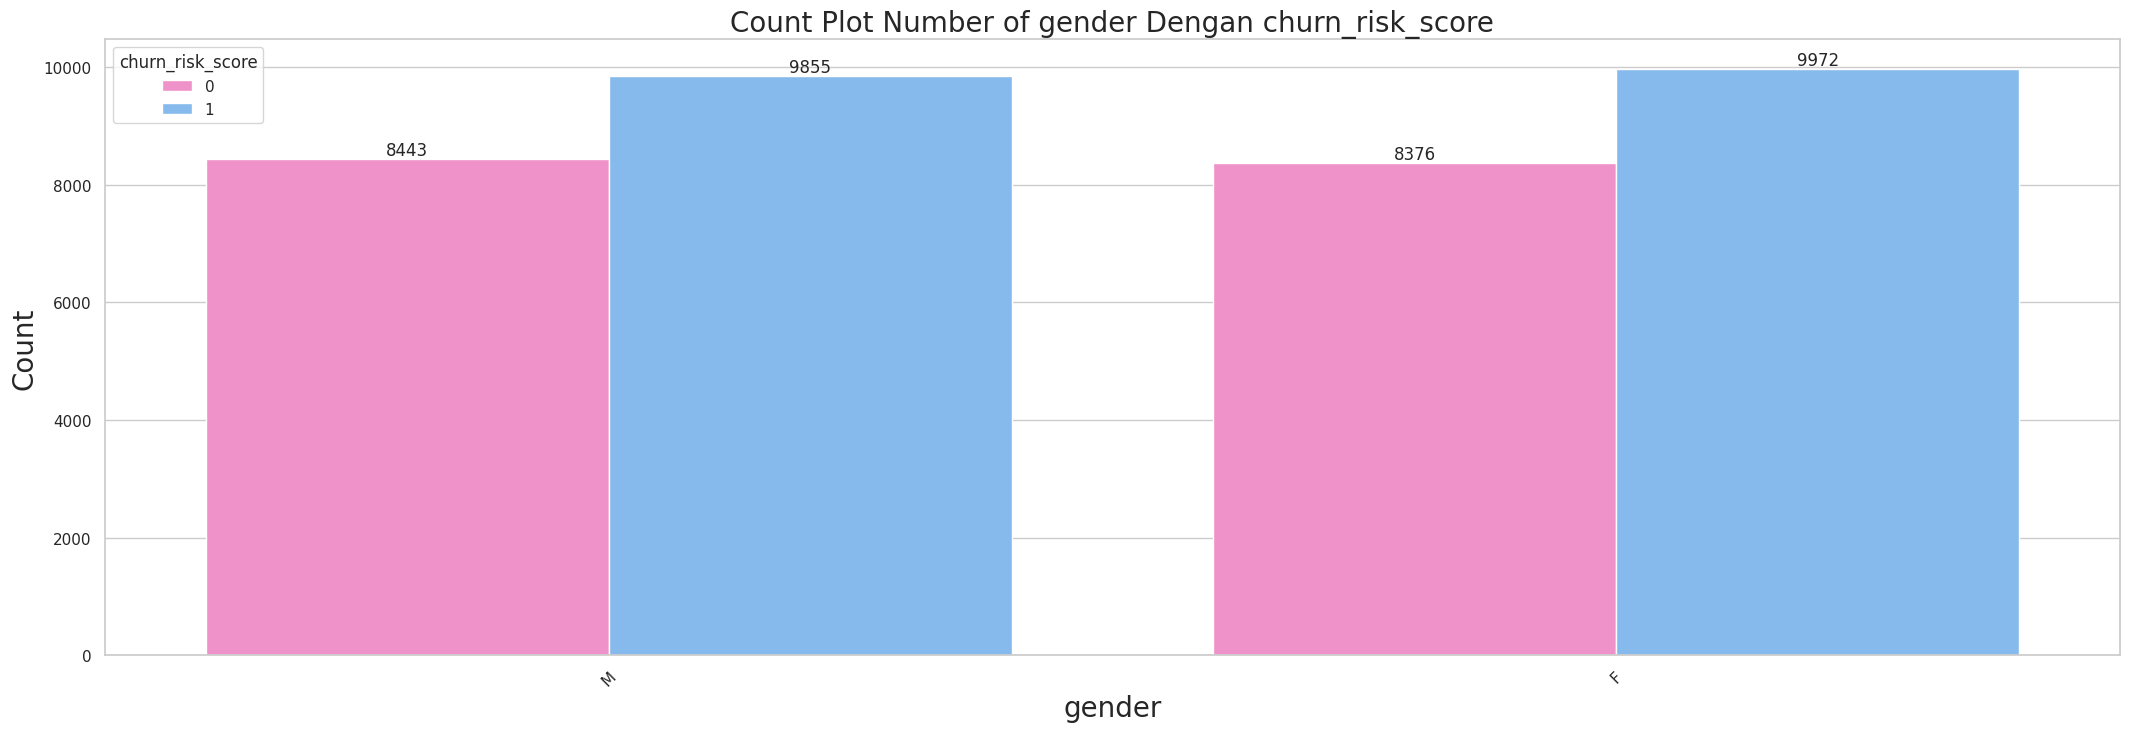

In [35]:
#plot bars of gender and total churn risk score
plotting_Profit('gender','churn_risk_score') # Plot-2

* The number of customers who churn tends to be more female customers.
* Customers with male gender have a greater number of customers in each churn_risk_score category compared to female customers.

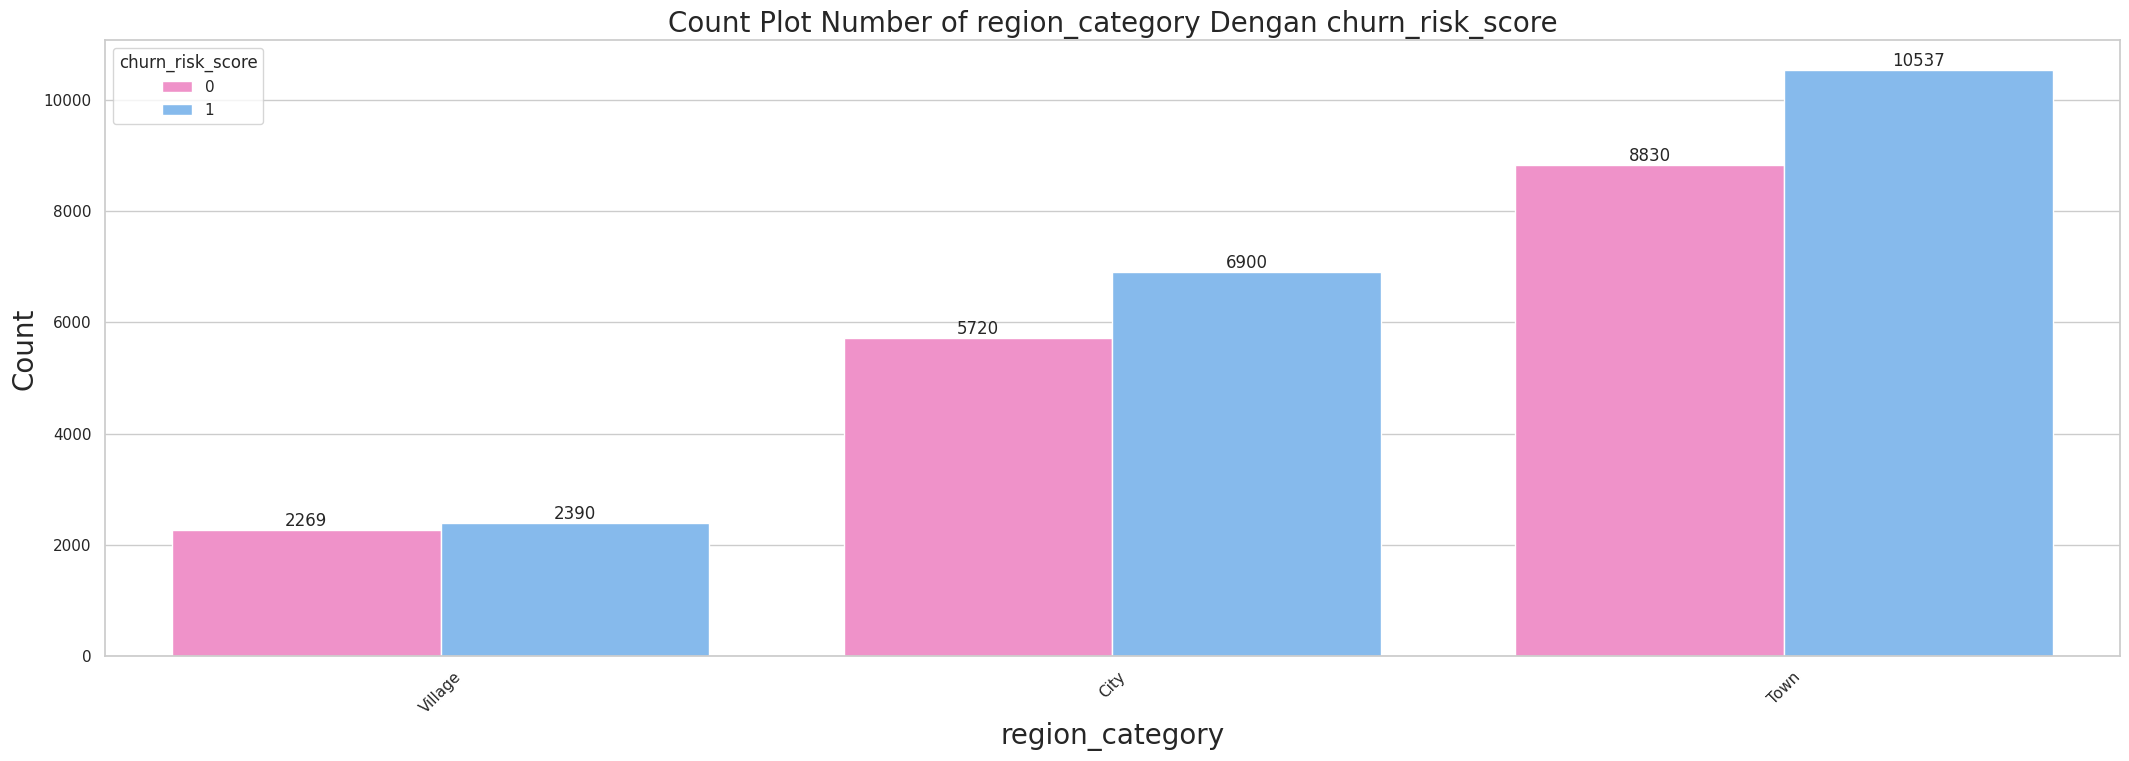

In [36]:
#plot bars from region_category and total churn_risk_score
plotting_Profit('region_category','churn_risk_score') # Plot-3

* The region category that churns the most is "Town", followed by "City" and "Village". The category of regions that do the most not churn is in the same order as "Town" churn, followed by "City" and "Village", but with different amounts the number of churn is higher in each region compared to each of the number of not churn

* The majority of customers with a high churn risk score are in the "Town" region category, while customers with a low churn risk score are in various regional categories, but most are in "City".

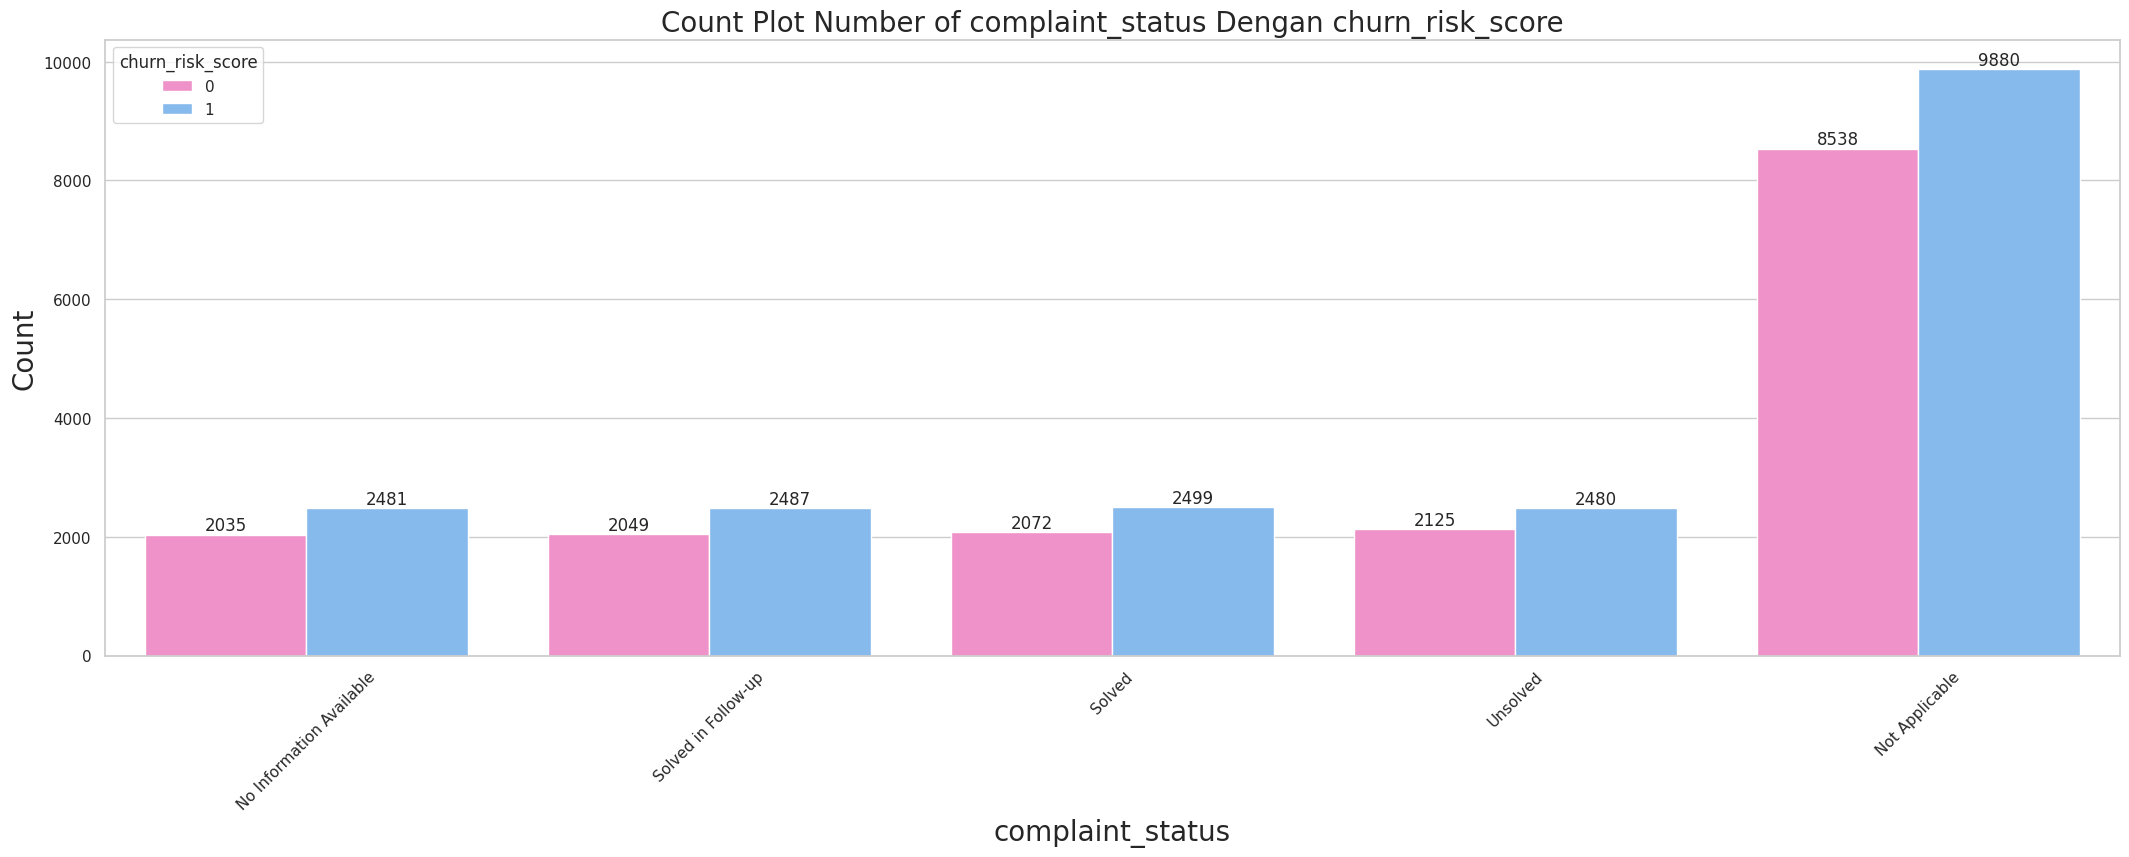

In [37]:
# bars plot of complaint_status and total churn_risk_score
plotting_Profit('complaint_status','churn_risk_score') # Plot-4

* From the Count Plot Number of Complaint Status graph with Churn Risk Score, it can be seen that the majority of customers who do not make complaints (complaint_status = 'No Information Available') tend to have a low churn risk score, while customers who do complain tend to have a churn risk score higher. This may suggest that the more dissatisfied a customer is with a service or product, the more likely they will switch to a competitor. Therefore, companies must ensure that customers are satisfied with the services and products they receive so that they do not switch to competitors.

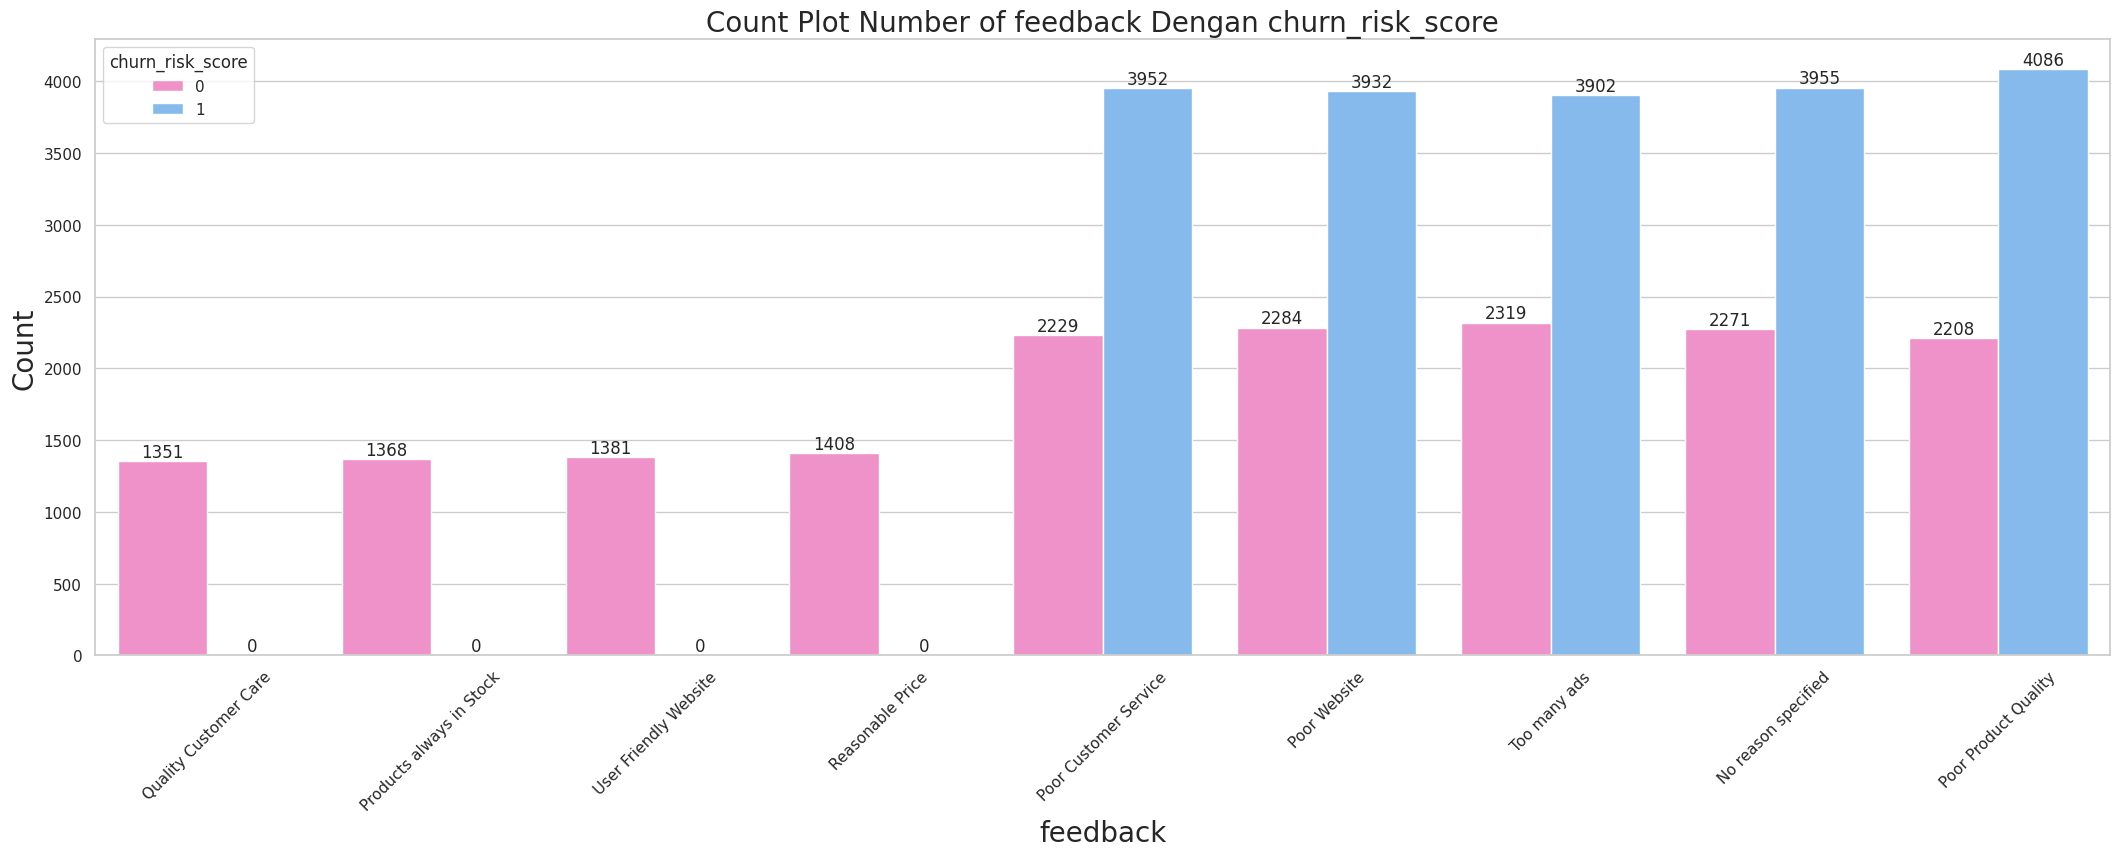

In [38]:
#plot bars of feedback and total churn_risk_score
plotting_Profit('feedback','churn_risk_score') # Plot-5

* From the graph above we can assume the categories are 'very satisfied', 'satisfied', 'neutral' and 'dissatisfied'
* It is seen that the majority of customers give "dissatisfied" or "neutral" feedback on the company's services such as (poor quality, too many ads, etc.). This needs to be considered by the company to improve service quality in order to increase customer satisfaction.
* Customers who provide "very satisfied" feedback tend to have a low level of churn risk score, while customers who provide "dissatisfied" or "neutral" feedback tend to have a high level of churn risk score. Therefore, companies need to pay attention to customer feedback to reduce churn rates and maintain loyal customers.

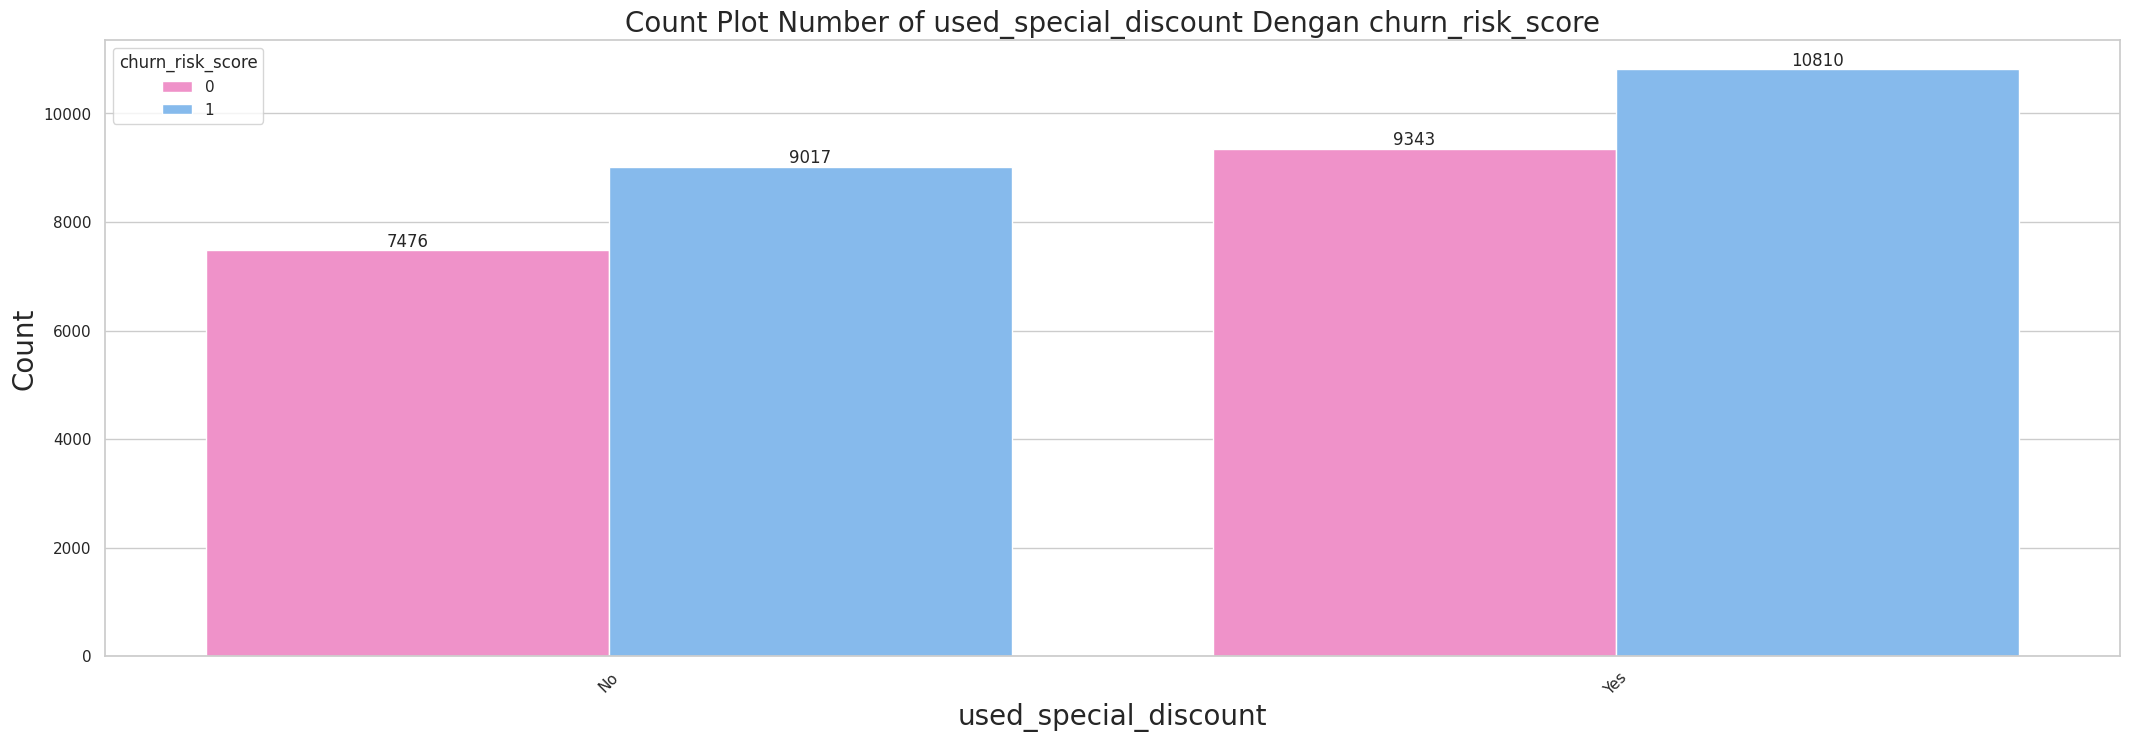

In [39]:
# bars plot of used_special_discount and the total churn_risk_score
plotting_Profit('used_special_discount','churn_risk_score') # Plot-6

* From this graph, insight can be drawn that the majority of customers who use special discounts have a lower churn risk score than customers who do not use special discounts. This shows that the use of special discounts can increase customer loyalty and reduce churn risk. However, further analysis is needed to determine other factors that affect the churn risk score.

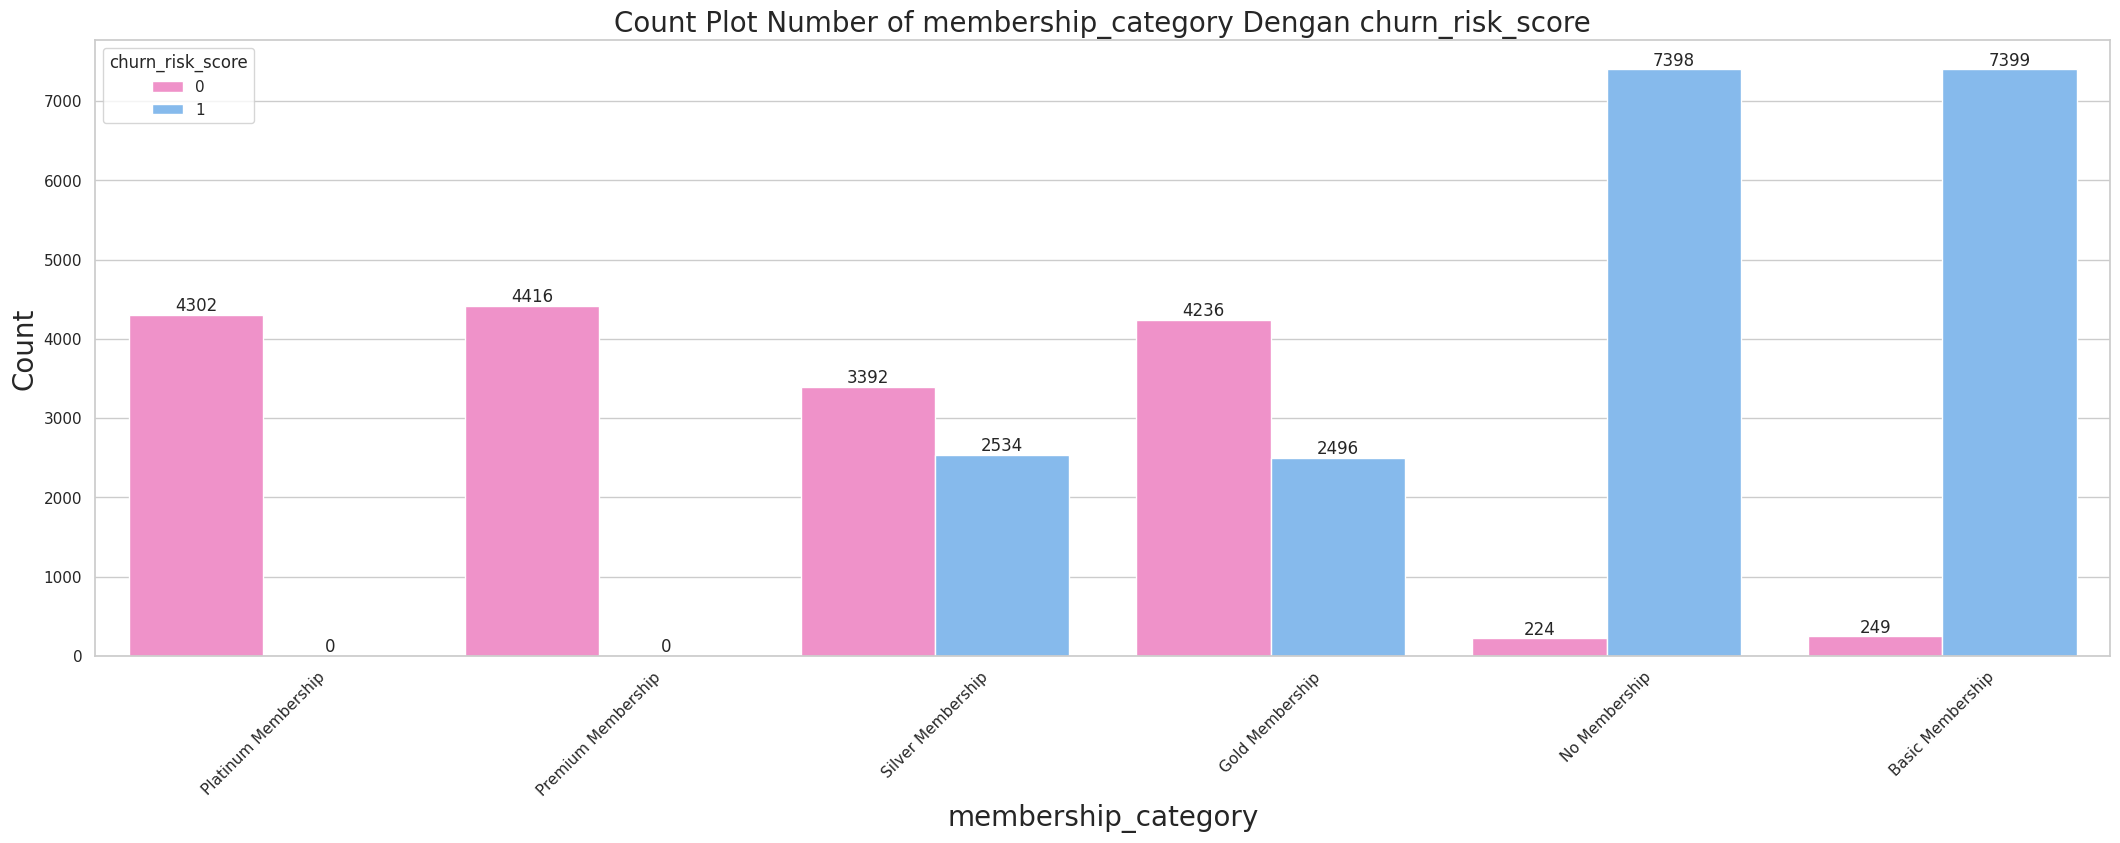

In [40]:
#plot bars of membership_category and total churn_risk_score
plotting_Profit('membership_category','churn_risk_score') # Plot-7

* From the graph, it can be seen that the number of customers who churn tends to be more in the 'Basic Membership' and 'No Membership' membership categories. Whereas in higher membership categories such as 'Gold Membership' and 'Premium Membership', the number of customers who churn is much less. This can be an insight that customers who are more loyal tend to choose a higher membership category and provide benefits for the company in the long term. Therefore, companies can consider strategies to increase the number of customers in higher membership categories.

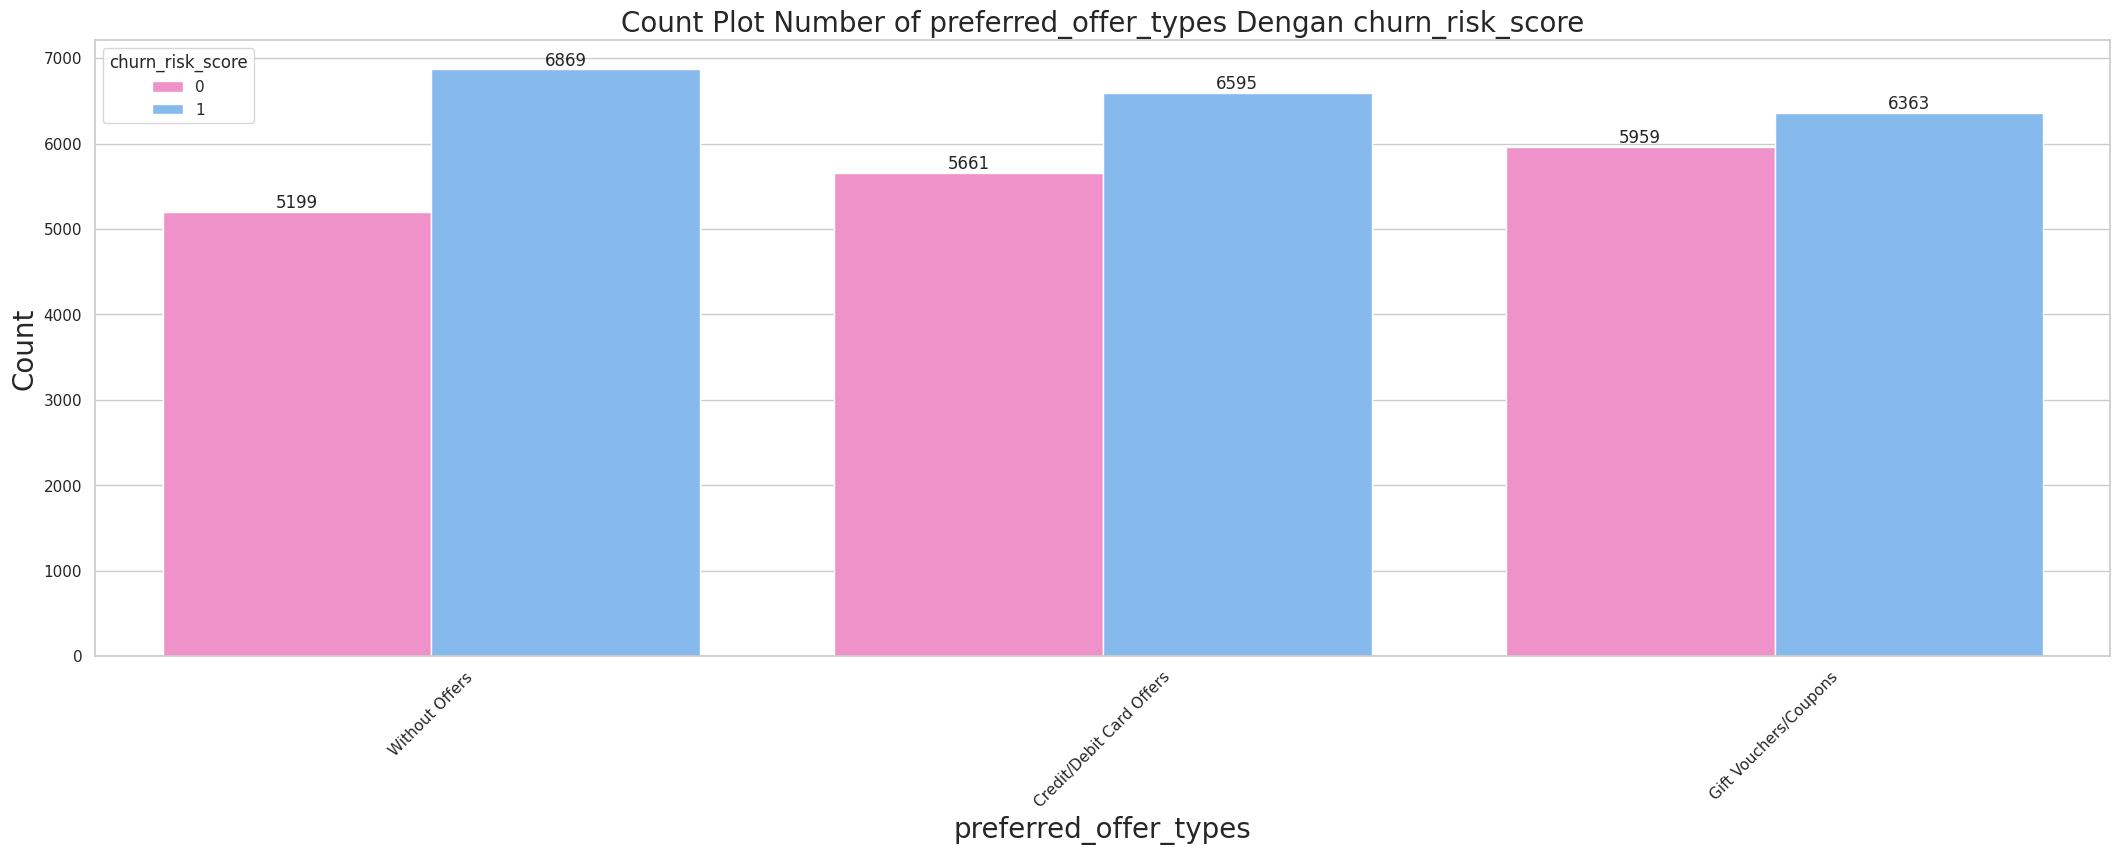

In [41]:
#plot bars of preferred_offer_types and total churn_risk_score
plotting_Profit('preferred_offer_types','churn_risk_score') # Plot-8

* The majority of customers have relatively the same "preferred_offer_types" value, namely "Gift Vouchers/Coupons".
* Customers with churn(1) value have the most frequency of all "preferred_offer_types" category values, i.e. 'without offers'
* Customers with a not churn(0) value have the lowest frequency of all "preferred_offer_types" category values, i.e. 'without offers'
* Customers with churn value (1) tend to prefer "Credit/Debit Card Offers" compared to those with not churn (0).

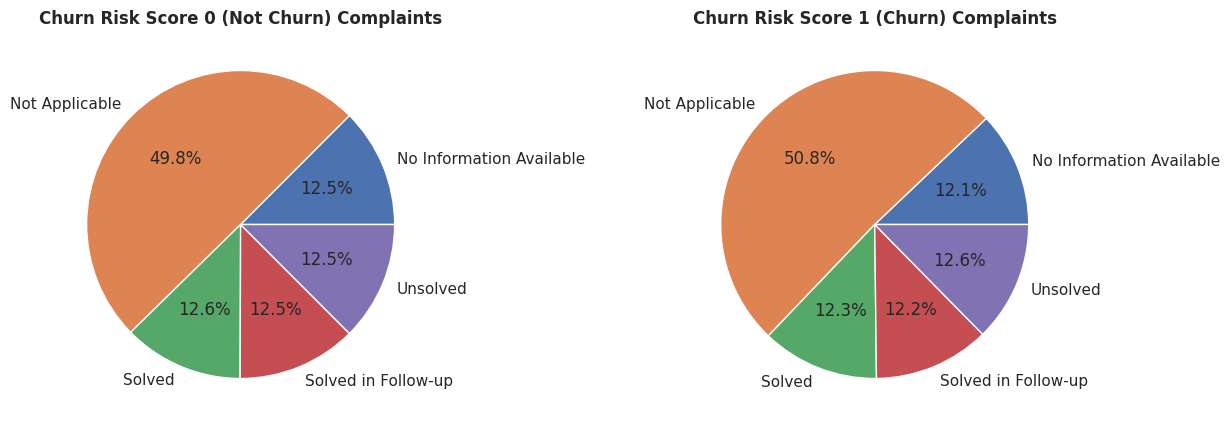

In [42]:
# Check whether the column 'churn risk score' exists in the DataFrame
if 'churn_risk_score' not in df.columns:
    print("The 'churn_risk_score' column does not exist in the dataframe.")
else:
   # Groupby based on the 'complaint_status', and 'churn_risk_score' columns, and count the number of rows for Churn Risk Score 1
    df_grouped_1 = df.groupby(['complaint_status', 'churn_risk_score']).size().reset_index(name='count')
    df_grouped_1 = df_grouped_1[df_grouped_1['churn_risk_score']==1]

    # Groupby based on 'complaint_status', and 'churn_risk_score' columns, and count the number of rows for Churn Risk Score 0
    df_grouped_0 = df.groupby(['complaint_status', 'churn_risk_score']).size().reset_index(name='count')
    df_grouped_0 = df_grouped_0[df_grouped_0['churn_risk_score']==0]

    # Create a picture with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Construct a pie chart for a Churn Risk Score of 0 in the left subplot
    axs[0].pie(df_grouped_1['count'], labels=df_grouped_0['complaint_status'], autopct='%1.1f%%')
    axs[0].set_title('Churn Risk Score 0 (Not Churn) Complaints', loc='center', fontweight='bold')

    # Construct a pie chart for a Churn Risk Score of 0 in the right subplot
    axs[1].pie(df_grouped_0['count'], labels=df_grouped_1['complaint_status'], autopct='%1.1f%%')
    axs[1].set_title('Churn Risk Score 1 (Churn) Complaints', loc='center', fontweight='bold')

    # Displays plot
    plt.show()


- The graphs shown are two pie charts which divide the data based on the "complaint_status" column for customers who fall into the churn risk score category 1 (left) and 0 (right). Insights that can be taken include:

     * Customers included in the churn risk score category of 0 (Not Churn) have the highest percentage of complaints in the "Solved" (12.6%) and "Solved in Follow-up" (12.5%) statuses.
     * Customers who are included in the churn risk score category 0 (Not Churn) have the lowest percentage of complaints on the status "No Information Available" (12.5%) and "Solved in follow up" (12.5%).
     * Customers who are included in the category of churn risk score 1 (Churn) have the highest percentage of complaints in the status "Unsolved" (12.6%) and "Solved" (12.3%).
     * Customers who are included in the churn risk score 1 (Churn) category have the lowest percentage of complaints on the status "No Information Available" (12.1%) and "solved in follow up" (16.1%).
     * Distribution of complaints based on the churn risk score, which can help identify the main reasons customers churn.
     * Comparison of the percentage of complaints between customers who churn and those who do not churn, which can give an idea of the relationship between churn risk scores and complaint status.
     * A comparison of the distribution of complaints between churn and non-churn customers, which can highlight the main types of complaints related to churn customers.

Text(0.5, 0, 'Membership Category')

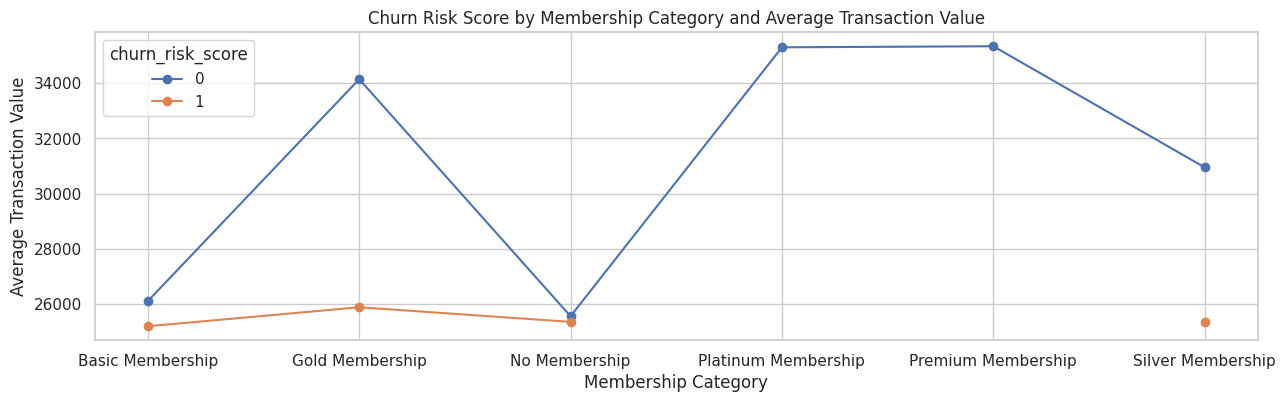

In [43]:
# group membership_category column and 'churn_risk_score' by calculating "mean" column 'avg_transaction_value'
df_grouped = df.groupby(['membership_category', 'churn_risk_score'])['avg_transaction_value'].mean().reset_index()

# Create a pivot table from a grouped dataframe
df_pivot = df_grouped.pivot(index='membership_category', columns='churn_risk_score', values='avg_transaction_value')

# Sort category membership pivot table in ascending order
df_pivot = df_pivot.sort_index(ascending=True)

# Plot pivot table with line
ax = df_pivot.plot(kind='line', figsize=(15, 4), marker='o')

# Add Title and labels to the plot
ax.set_title('Churn Risk Score by Membership Category and Average Transaction Value')
ax.set_ylabel('Average Transaction Value')
ax.set_xlabel('Membership Category')


- The graph shows the relationship between churn_risk_score and the average transaction value for each membership category. It can be seen that the higher the not churn risk score, the higher the average transaction value. In addition, it can be seen that the "Basic" membership category has the lowest average transaction value, while the "Premium" and Platinum membership categories have the highest average transaction value. Therefore, the insight that can be drawn is the importance of paying attention to churn_risk_score in determining strategies to increase the customer transaction value, as well as paying special attention to "Basic" membership category customers who have a lower average transaction value.

Text(0.5, 0, 'Membership Category')

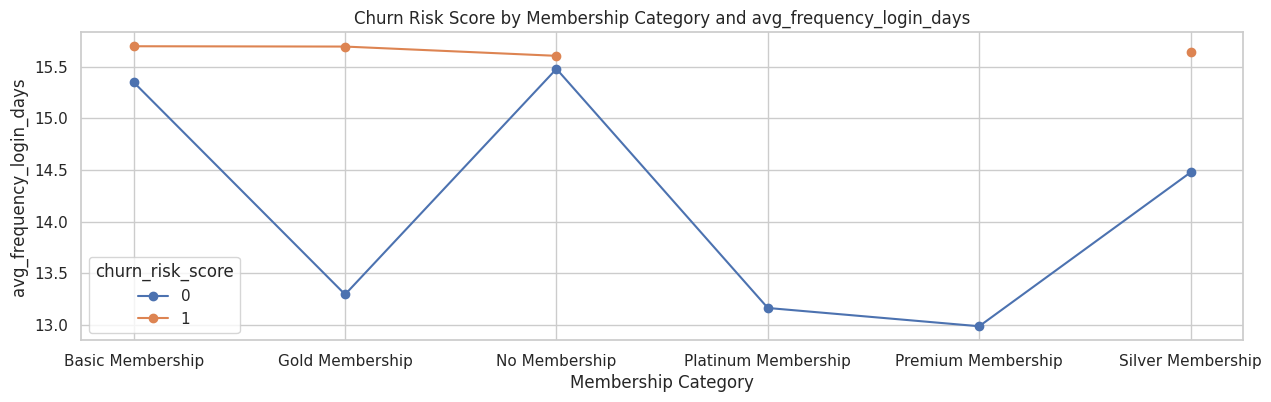

In [44]:
# group membership_category column and 'churn_risk_score' by calculating the mean column 'avg_frequency_login_days'
df_grouped = df.groupby(['membership_category', 'churn_risk_score'])['avg_frequency_login_days'].mean().reset_index()

# Create a pivot table from a grouped dataframe
df_pivot = df_grouped.pivot(index='membership_category', columns='churn_risk_score', values='avg_frequency_login_days')

# Sort category membership pivot table in ascending order
df_pivot = df_pivot.sort_index(ascending=True)

# Plot pivot table with line
ax = df_pivot.plot(kind='line', figsize=(15, 4), marker='o')

# Add Title and labels to the plot
ax.set_title('Churn Risk Score by Membership Category and avg_frequency_login_days')
ax.set_ylabel('avg_frequency_login_days')
ax.set_xlabel('Membership Category')

* The higher the churn risk score, the lower the average number of days logged by users in a certain period. This shows that there is a negative correlation between churn risk score and user login frequency.
* Users with a "Premium" Membership category tend to have a lower login frequency than users with other membership categories, especially those with a high churn risk score. This shows that users with the "Premium" membership category tend to be more disloyal to the platform than users with other membership categories.
* Users with "Basic" and no membership categories tend to have a higher login frequency than users with other membership categories with a low churn risk score. This shows that users with the "Basic" membership category tend to be less loyal to the platform, especially those with a low churn risk score.

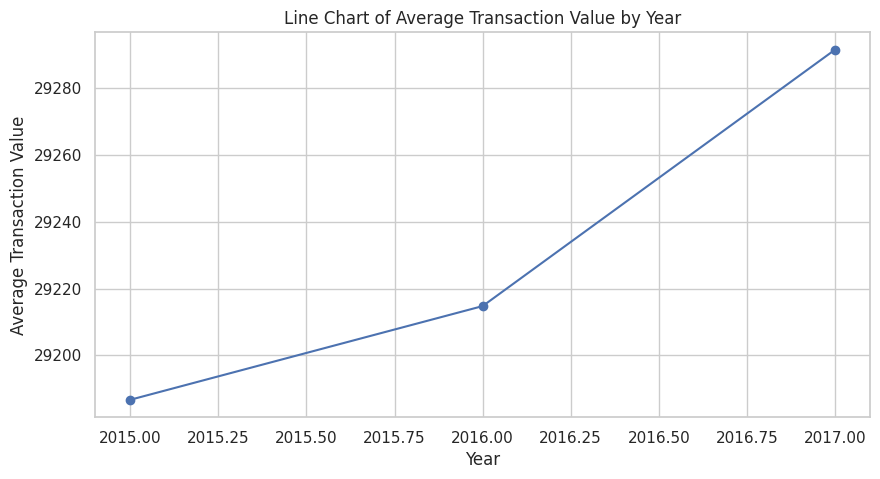

In [45]:
# filter data from 2015 June 02 to 2017 Dec 31
start_date = pd.Timestamp('2015-06-02')
end_date = pd.Timestamp('2017-12-31')
df_filtered = df.loc[(df['joining_date'] >= start_date) & (df['joining_date'] <= end_date)]

# set joining_date as index
df_filtered = df_filtered.set_index('joining_date')

# group by year
df_year = df_filtered.groupby(df_filtered.index.year)

# calculate mean of avg_transaction_value by year
df_mean = df_year.mean()

# create array of axes with two rows and one column
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)

# plot line chart for avg_transaction_value by year
ax.plot(df_mean.index, df_mean['avg_transaction_value'], marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Average Transaction Value')
ax.set_title('Line Chart of Average Transaction Value by Year')

plt.show()


* From the graph, it can be seen that the average customer transaction value tends to increase over time, from 2015 to 2017. This shows that customers are becoming more active in making transactions and may be more loyal to the business. This can be a positive signal for a business to retain existing customers and attract new customers by offering attractive services or products.

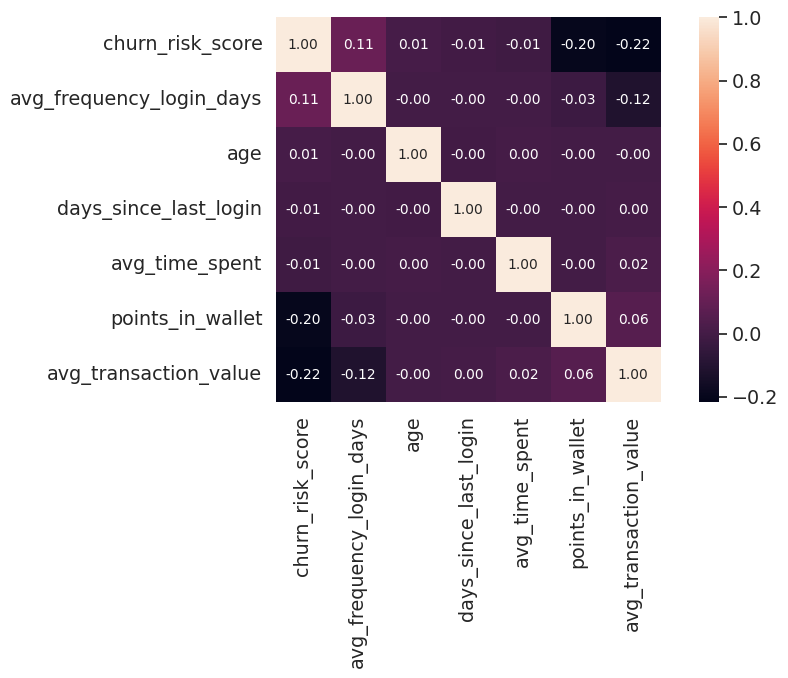

In [46]:
#check numerical correlation
k = 30 # number of variables heatmap
plt.figure(figsize=(10,5))
cols = df.corr().nlargest(k, 'churn_risk_score')['churn_risk_score'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [47]:
df.corr().nlargest(7, 'churn_risk_score')['churn_risk_score']


churn_risk_score            1.000000
avg_frequency_login_days    0.114466
age                         0.006048
days_since_last_login      -0.006804
avg_time_spent             -0.013594
points_in_wallet           -0.200662
avg_transaction_value      -0.217844
Name: churn_risk_score, dtype: float64

In [48]:
df.drop(columns=['user_id','joining_date','last_visit_time','days_since_last_login'],inplace=True)

In [49]:
#phik correlation for numerical and categorical
df.phik_matrix().nlargest(18,'churn_risk_score')['churn_risk_score']

interval columns not set, guessing: ['age', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.942304
feedback                        0.455936
points_in_wallet                0.449527
avg_transaction_value           0.408894
avg_frequency_login_days        0.165866
joined_through_referral         0.043545
offer_application_preference    0.029310
preferred_offer_types           0.025768
avg_time_spent                  0.025319
used_special_discount           0.013849
region_category                 0.012242
past_complaint                  0.011981
medium_of_operation             0.010742
complaint_status                0.003034
internet_option                 0.002008
gender                          0.000000
age                             0.000000
Name: churn_risk_score, dtype: float64

* From the data above we can see the correlation between the columns and the target, so that it can be used as a reference in carrying out feature selection.

# V. Feature Engineering / Preprocessing

In [50]:
# Convert column to list and store in new variable
ncol = df.describe().columns.tolist()
cacol = df.select_dtypes(include =['object']).columns.tolist()

In [51]:
# Categorical overview
df[cacol].describe(include = 'object').T

,count,unique,top,freq
gender,36646,2,F,18348
region_category,36646,3,Town,19367
membership_category,36646,6,Basic Membership,7648
joined_through_referral,36646,2,No,21093
preferred_offer_types,36646,3,Gift Vouchers/Coupons,12322
medium_of_operation,36646,3,Desktop,19120
internet_option,36646,3,Wi-Fi,12290
used_special_discount,36646,2,Yes,20153
offer_application_preference,36646,2,Yes,20247
past_complaint,36646,2,No,18418


In [52]:
#check column existence
column_names = ['membership_category','feedback','points_in_wallet','avg_transaction_value','churn_risk_score']
column_indices = [df.columns.get_loc(col) for col in column_names]
print(column_indices)

[3, 16, 11, 9, 17]


In [53]:
df1 = df.iloc[:,[3, 16, 11, 9,17]]
df1.head()

,membership_category,feedback,points_in_wallet,avg_transaction_value,churn_risk_score
0,No Membership,Poor Website,627.48,38604.69,1
1,Basic Membership,Poor Customer Service,575.97,7665.66,1
2,Silver Membership,Too many ads,767.93,37671.69,0
3,No Membership,Too many ads,590.22,15678.14,1
4,Silver Membership,Poor Product Quality,722.04,8422.68,0


The following is Feature importance which is a method for determining how important each feature or attribute is in a machine learning model in making decisions or predictions.

In [54]:
#check uniq values for nonstandard missing values
for i in df1:
    print(i, ':' , df1[i].unique(), '\n')

membership_category : ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership'] 

feedback : ['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website'] 

points_in_wallet : [627.48 575.97 767.93 ... 835.98 744.99 700.93] 

avg_transaction_value : [38604.69  7665.66 37671.69 ... 39305.35 46108.73 26905.49] 

churn_risk_score : [1 0] 



In [55]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [56]:
jk = df1.iloc[:, [3,4]]
calc_vif(jk)

,variables,VIF
0,avg_transaction_value,1.392723
1,churn_risk_score,1.392723


from the multicolarity calculation above, this variable has no relationship with other independent variables

# Data Splitting

In [57]:
# Split Fitur and Target
X = df1.drop('churn_risk_score', axis=1)
y = df1['churn_risk_score']

In [58]:
# Split Train and Test
X_train, X_test,  y_train, y_test = train_test_split(X,y,shuffle=True, test_size=0.2,stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, stratify=y_train, random_state=42)

In [59]:
for i in [X_train, X_test, X_val, y_train, y_test, y_val]:
    print(i.shape)

(23452, 4)
(7330, 4)
(5864, 4)
(23452,)
(7330,)
(5864,)


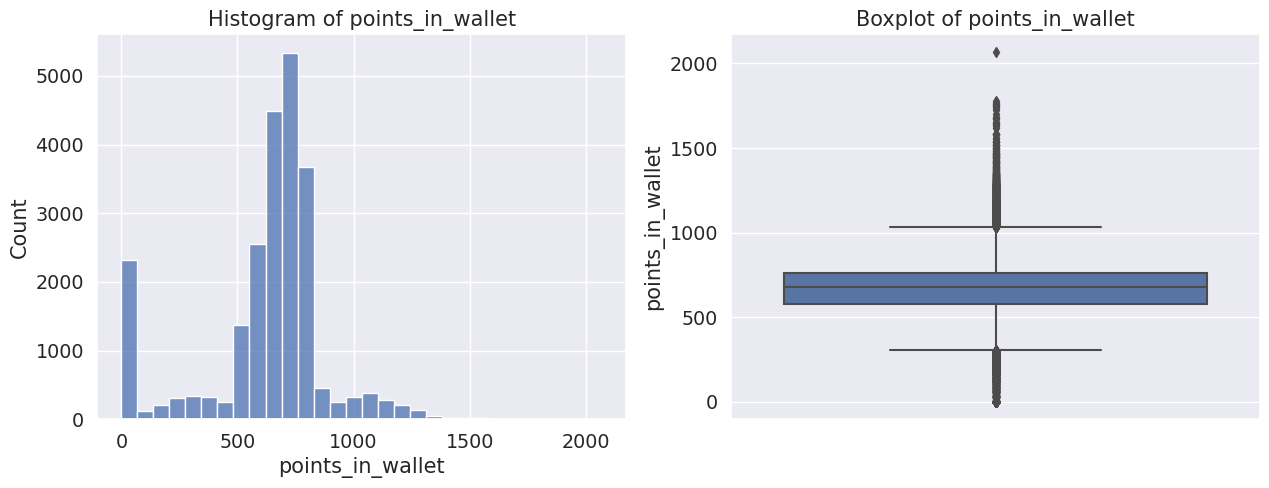


Skewness Value :  -0.7714593438032831


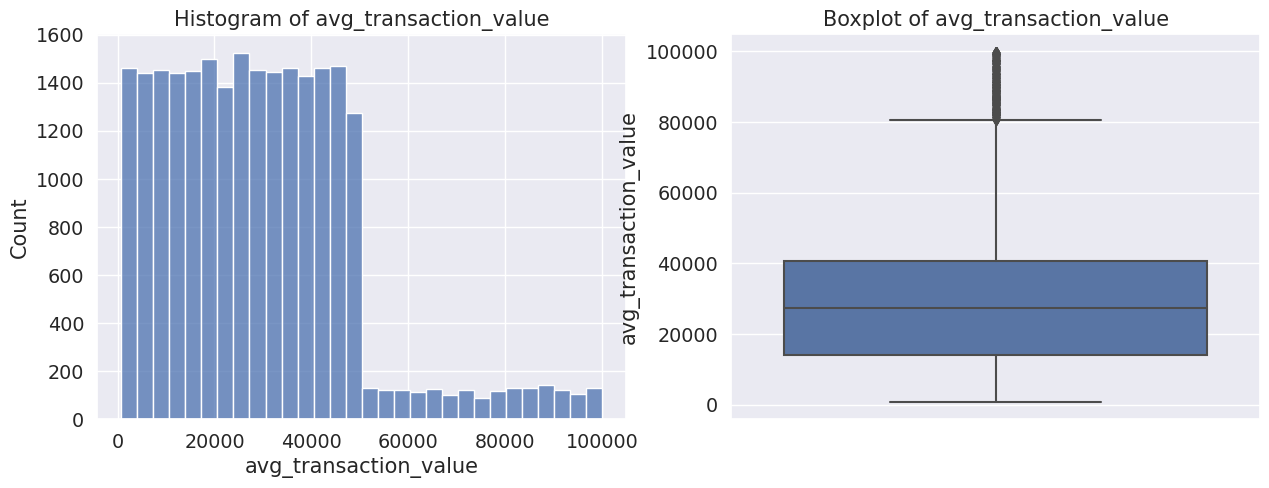


Skewness Value :  1.0233066665534205


In [60]:
#View distribution & outliers in numeric columns
num_col_unclear = X_train[['points_in_wallet','avg_transaction_value'
 ]]

# looping num_col_unclear
for col in num_col_unclear:
    # Define figure size
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], bins=30)
    plt.title('Histogram of {}'.format(col))

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[col])
    plt.title('Boxplot of {}'.format(col))


    plt.show()
    # diagnostic_plots(num_col)
    print('\nSkewness Value : ', X_train[col].skew())

* The normal distribution limit is 0.5 to -0.5 if it exceeds this limit then the distribution can be said to be an abnormal distribution
* for normal distribution handling using the Gaussian method while abnormal distribution using the Tukeys (IQR) method
* The 'points_in_wallet' column has an anomalously inward distribution with a slight skewness to the right, and some outliers to the right of the boxplot are worth noting.

* Column 'avg_transaction_value' also has an abnormal distribution, there are some outliers to the right of the boxplot. The skewness for this column is 1.02 which indicates a slightly left-skewed distribution.

* Normalization is done using the MinMaxScaler method considering that the outliers are not normal

In [61]:
#pipline scaler
num_pipeline = Pipeline([
        ('winsorizer_iqr', Winsorizer(capping_method='iqr', tail='both', fold=3)),  #capping process
        ('imputer', SimpleImputer(strategy='median')), #imputer missing value
        ('scaler',  MinMaxScaler()) #scaling numerical
    ])

num_tr = num_pipeline.fit_transform(X_train[['points_in_wallet','avg_transaction_value']])
num_tr

array([[0.62321213, 0.81591314],
       [0.55274127, 0.3812461 ],
       [0.21179929, 0.41093981],
       ...,
       [0.57542038, 0.65031465],
       [0.39679792, 0.10079385],
       [0.47196317, 0.03710742]])

In [62]:
# Pipeline for handling outliers in the dataset
cat_1_pipeline = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder())
    ])

cat_1_tr = cat_1_pipeline.fit_transform(X_train[['feedback']])

In [63]:
membership_level = ['No Membership', 'Basic Membership', 'Silver Membership','Gold Membership','Premium Membership','Platinum Membership']
#membership order based on the points collected
cat_2_pipeline = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('ordinal_enc', OrdinalEncoder(categories=[membership_level]))
    ])

cat_2_tr = cat_2_pipeline.fit_transform(X_train[['membership_category']])

In [64]:
#combine scaler & ordinal in 1 variable
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['points_in_wallet','avg_transaction_value']),
        ("ohe_enc", cat_1_pipeline, ['feedback']),
        ("ordinal_enc", cat_2_pipeline, ['membership_category'])

    ])
#final x_train
train_final = full_pipeline.fit_transform(X_train)
train_final

array([[0.62321213, 0.81591314, 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.55274127, 0.3812461 , 0.        , ..., 0.        , 0.        ,
        2.        ],
       [0.21179929, 0.41093981, 0.        , ..., 0.        , 0.        ,
        2.        ],
       ...,
       [0.57542038, 0.65031465, 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.39679792, 0.10079385, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.47196317, 0.03710742, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [65]:
#final test
test_final = full_pipeline.transform(X_test)
test_final.shape

(7330, 12)

In [66]:
#val_train
val_tr = full_pipeline.transform(X_val)
val_tr.shape

(5864, 12)

# Architecture Model (Pipeline (Tensorflow))

In [67]:
train_pipe = tf.data.Dataset.from_tensor_slices((train_final, y_train)).batch(64).repeat(3)
test_pipe  = tf.data.Dataset.from_tensor_slices((test_final, y_test)).batch(64)
val_pipe   = tf.data.Dataset.from_tensor_slices((val_tr, y_val)).batch(64)

* Train, test, and validation data are processed using the TensorFlow Dataset API by dividing data into small batches of 64 sizes, which can speed up the training process on neural network models.
* The train data is repeated 3 times, meaning that the model will learn the train data 3 times in each epoch.
* The test and validation data are not repeated, because the model will only study the train data and be tested on the test and validation data at the end of each epoch.

In [68]:
alp = 10
inp = train_final.shape[1]
out = 1
hid = int(len(train_final)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

Jumlah neuron pada hidden layer: 180


To calculate the number of neurons in the hidden layer using the Hecht-Nielsen formula which is referred to as "the rule of thumb" or the rule of thumb.
Determination of the number of neurons in the hidden layer

Nh=Ns(α∗(Ni+No))

𝑁𝑖 = number of input neurons.

𝑁𝑜 = number of output neurons.

𝑁𝑠 = number of samples in training data set.

𝛼 = an arbitrary scaling factor usually 2-10.

Reference: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# VI. Model Definitions

## Sequential Default

In [69]:

model_seq_def = Sequential()
model_seq_def.add(Dense(inp, activation='relu',kernel_initializer='GlorotUniform', input_shape=(inp,)))
model_seq_def.add(Dense(hid, activation='relu'))
model_seq_def.add(Dense(out, activation='sigmoid'))

# Compile
model_seq_def.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_seq_def.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 180)               2340      
                                                                 
 dense_2 (Dense)             (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


* Models created using the Keras Sequential library, which makes it possible to add layers easily and quickly.
* The model consists of 3 layers, namely the input layer using the variables that have been set using the Hecht-Nielsen formula, inp(input layer), hid(hiden layer), and out(output layer) with 1 node and using the sigmoid as the activation function- his.
* The model is compiled using binary crossentropy as loss function, Adam optimizer, and accuracy as metrics.
Since there is no specific setting for kernel_initializer or kernel_regularizer, the default values used in the Dense layer will be used.

# Sequential Tune

In [70]:
model_seq_tune = Sequential()

model_seq_tune.add(tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,), kernel_initializer='he_uniform')) # input layer
model_seq_tune.add(tf.keras.layers.BatchNormalization())

model_seq_tune.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform',bias_initializer=Zeros())) # hidden layer
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dropout(0.1))

model_seq_tune.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',bias_initializer=Zeros())) # hidden layer
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dropout(0.1))

model_seq_tune.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',bias_initializer=Zeros())) # hidden layer
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dropout(0.1))
model_seq_tune.add(tf.keras.layers.Dense(out, activation='sigmoid')) # output layer

# Compile the model
model_seq_tune.compile(loss='binary_crossentropy',
                       optimizer='Adam',
                       metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.6)]
                      )

model_seq_tune.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)               

* using several hidden layers with different numbers of neurons, as well as using regularization (kernel_regularizer) and normalization (BatchNormalization) techniques to improve model performance. In addition, the use of the optimizer Adam and BinaryAccuracy as evaluation metrics can also help improve model accuracy.
* In the summary of this model there is information about the number of parameters in each layer and the total number of parameters in the model. There is also information about the shape of the output on each layer.

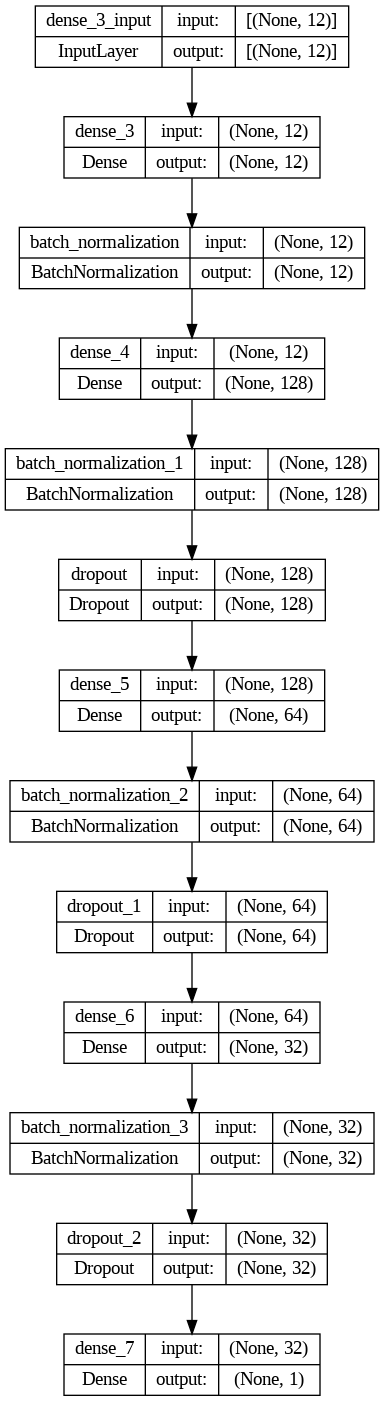

In [71]:
tf.keras.utils.plot_model(model_seq_tune, show_shapes=True)

* Visualizing this plot can give us an idea of the structure of the model, including the input layer, hidden layer, and output layer, as well as the number of neurons in each layer.
* The plot shows an input layer with as many neurons as the input layer from the Hecht-Nielsen formula that has been set, then two hidden layers with 128 and 64 neurons each, and an output layer with one neuron. The plot also shows the connections between each layer and additional information such as the number of parameters in each layer.

 ## Functional API Default

In [72]:

input_layer = Input(shape=(inp,))
h1_layer = Dense(inp, activation='relu',kernel_initializer='GlorotUniform')(input_layer)
h2_layer = Dense(hid, activation='relu')(h1_layer)
output_layer = Dense(out, activation='sigmoid')(h2_layer)

model_func_def = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func_def.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_func_def.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 180)               2340      
                                                                 
 dense_10 (Dense)            (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


* This model uses the functional API on TensorFlow Keras to build its model architecture.
* The model consists of three layers, namely the input layer, the hidden layer, and the output layer. The input layer and hidden layer use the ReLU activation function.
The output layer uses the sigmoid activation function.
* Model compiled using binary_crossentropy loss function and Adam optimizer, and using BinaryAccuracy as metrics for model evaluation.
* Model summary displays information about the output size of each layer, the number of parameters that can be set, as well as information about the type of activation function and the type of optimizer used.

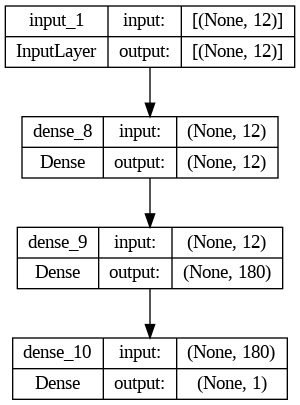

In [73]:
tf.keras.utils.plot_model(model_func_def, show_shapes=True)

## Functional API Tune

In [74]:
input_lyr = tf.keras.layers.Input(shape=(train_final.shape[1],))
layers1 = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='he_uniform',bias_initializer=Zeros())(input_lyr)
layers2 = tf.keras.layers.BatchNormalization()(layers1)
layers3 = tf.keras.layers.Dense(hid, kernel_initializer='he_uniform',activation='relu',bias_initializer=Zeros())(layers2)
layers4 = tf.keras.layers.BatchNormalization()(layers3)
layers5 = tf.keras.layers.Dropout(0.1)(layers4)
layers6 = tf.keras.layers.Dense(hid, kernel_initializer='he_uniform',activation='relu',bias_initializer=Zeros())(layers5)
layers7 = tf.keras.layers.BatchNormalization()(layers6)
layers8 = tf.keras.layers.Dropout(0.1)(layers7)
layers9 = tf.keras.layers.Dense(hid, kernel_initializer='he_uniform',activation='relu',bias_initializer=Zeros())(layers8)
layers10 = tf.keras.layers.BatchNormalization()(layers9)
layers11 = tf.keras.layers.Dropout(0.1)(layers10)
output = tf.keras.layers.Dense(out, kernel_initializer='he_uniform',activation='sigmoid',bias_initializer=Zeros())(layers11)

model_func_tune = tf.keras.models.Model(inputs=input_lyr,outputs=output)

# Compile
model_func_tune.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_func_tune.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_11 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_4 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_5 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 180)               0   

* model neural networks using the functional API from Keras. This model consists of 8 layers, including 1 input layer, 2 hidden layers, 2 batch normalization layers, and 2 dropout layers, and 1 output layer.
* The input layer accepts input with the same shape as the shape of the data used for training.

* The dropout layer is used as a regularization technique in artificial neural networks. The purpose of the regularization technique is to avoid overfitting the model. Overfitting occurs when the model is too complex to generalize well to data it has never seen before.
* A dropout layer with a value of 0.1 is used after the two hidden layers (layers5 and layers7). This aims to reduce the complexity of the model and prevent overfitting of the model. With a dropout of 0.1, 10% of the units in the previous layer are randomly disabled during training.

Reference:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

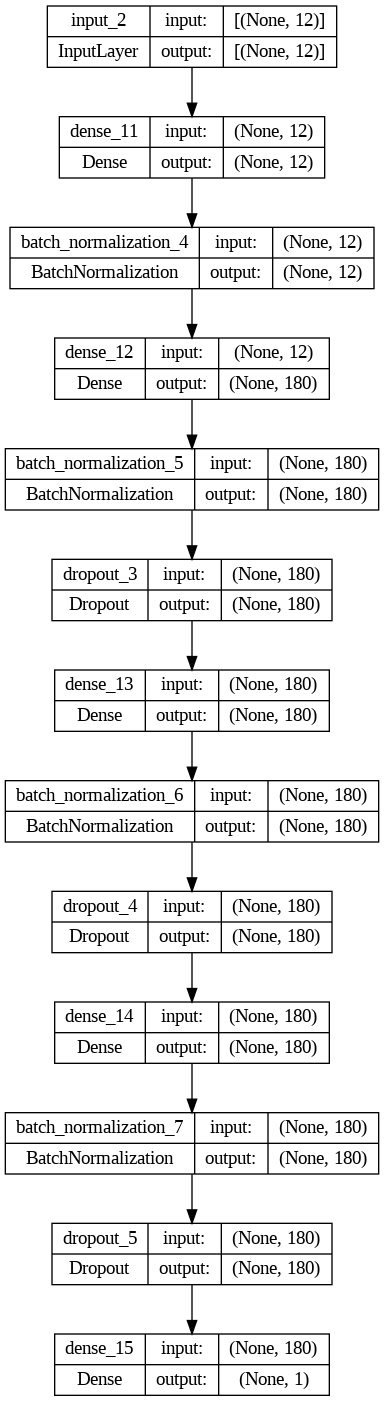

In [75]:
tf.keras.utils.plot_model(model_func_tune, show_shapes=True)

# VII. Model Training

In [76]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

* EarlyStopping: This object will stop training the model if there is no visible improvement in validation performance (in this case, we are using the val_loss metric) for several consecutive epochs. The Patience specified here is 3, meaning that if performance does not improve for 3 consecutive epochs, the training will be terminated. restore_best_weights set as True means that the model will use the best weight that has been stored during training.
* ModelCheckpoint: This object will save the model with the best validation performance in the model_best.hdf5 file. monitor is specified as val_loss, meaning that the model will be saved if validation performance is better than before. save_best_only set as True means that only the best performing models will be saved, and previous models with poorer performance will not be saved.

# Sequential Default

In [77]:
%%time
history_seq_def = model_seq_def.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks1)

Epoch 1/50
1101/1101 [==============================] - 4s 2ms/step - loss: 0.3018 - accuracy: 0.8431 - val_loss: 0.2790 - val_accuracy: 0.8479
Epoch 2/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2746 - accuracy: 0.8477 - val_loss: 0.2675 - val_accuracy: 0.8453
Epoch 3/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2632 - accuracy: 0.8569 - val_loss: 0.2569 - val_accuracy: 0.8663
Epoch 4/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2538 - accuracy: 0.8799 - val_loss: 0.2488 - val_accuracy: 0.8956
Epoch 5/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2471 - accuracy: 0.8962 - val_loss: 0.2440 - val_accuracy: 0.9079
Epoch 6/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2422 - accuracy: 0.9042 - val_loss: 0.2395 - val_accuracy: 0.9122
Epoch 7/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2359 - accuracy: 0.9110 - val_loss: 0.2336 - val_accuracy:

# Sequential Tune

In [78]:
%%time
history_seq_tune = model_seq_tune.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks1)

Epoch 1/50
1101/1101 [==============================] - 8s 4ms/step - loss: 0.2869 - binary_accuracy: 0.8520 - val_loss: 0.2487 - val_binary_accuracy: 0.8699
Epoch 2/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.2356 - binary_accuracy: 0.8956 - val_loss: 0.1807 - val_binary_accuracy: 0.9246
Epoch 3/50
1101/1101 [==============================] - 5s 4ms/step - loss: 0.2018 - binary_accuracy: 0.9185 - val_loss: 0.1815 - val_binary_accuracy: 0.9209
Epoch 4/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.1908 - binary_accuracy: 0.9221 - val_loss: 0.1832 - val_binary_accuracy: 0.9183
Epoch 5/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.1852 - binary_accuracy: 0.9233 - val_loss: 0.1698 - val_binary_accuracy: 0.9200
Epoch 6/50
1101/1101 [==============================] - 5s 4ms/step - loss: 0.1818 - binary_accuracy: 0.9242 - val_loss: 0.1611 - val_binary_accuracy: 0.9243
Epoch 7/50
1101/1101 [==============================

Analysis: Based on the results of a comparison between the Sequential Default and Sequential Tune models, the Improved model to the model that has been tuned, there has been an increase in several respects, namely:

* Default -> Tune Improve
* total time = 2min 23s -> 1min 37s (improve)
* loss = 0.1762 -> 0.1740 (improved)
* val loss = 0.427 -> 0.1658 (improve)
* binary accuracy = 0.9269 -> 0.9269 (same accuracy)
* val_binary_accuracy = 0.9280 -> 0.9262 (decrease but very slight)
* it can be concluded that we managed to improve the model

from the prediction results it can be concluded that it succeeded in perfecting the model in terms of total time, loss, val loss.

# Functional API Default

In [79]:
callbacks2= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best_func.hdf5', monitor='val_loss', save_best_only=True)
]

* EarlyStopping: This object will stop training the model if there is no visible improvement in validation performance (in this case, we are using the val_loss metric) for several consecutive epochs. The Patience specified here is 3, meaning that if performance does not improve for 3 consecutive epochs, the training will be terminated. restore_best_weights set as True means that the model will use the best weight that has been stored during training.
* ModelCheckpoint: This object will save the model with the best validation performance in the model_best.hdf5 file. monitor is specified as val_loss, meaning that the model will be saved if validation performance is better than before. save_best_only set as True means that only the best performing models will be saved, and previous models with poorer performance will not be saved.

In [80]:
%%time
history_func_def = model_func_def.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks2)

Epoch 1/50
1101/1101 [==============================] - 4s 2ms/step - loss: 0.3100 - accuracy: 0.8407 - val_loss: 0.2841 - val_accuracy: 0.8472
Epoch 2/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2806 - accuracy: 0.8489 - val_loss: 0.2762 - val_accuracy: 0.8464
Epoch 3/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2727 - accuracy: 0.8488 - val_loss: 0.2678 - val_accuracy: 0.8457
Epoch 4/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2652 - accuracy: 0.8518 - val_loss: 0.2613 - val_accuracy: 0.8508
Epoch 5/50
1101/1101 [==============================] - 3s 3ms/step - loss: 0.2599 - accuracy: 0.8572 - val_loss: 0.2577 - val_accuracy: 0.8615
Epoch 6/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2568 - accuracy: 0.8608 - val_loss: 0.2559 - val_accuracy: 0.8685
Epoch 7/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2549 - accuracy: 0.8628 - val_loss: 0.2545 - val_accuracy:

In [81]:
%%time
history_func_tune = model_func_tune.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks2)

Epoch 1/50
1101/1101 [==============================] - 11s 8ms/step - loss: 0.2829 - accuracy: 0.8557 - val_loss: 0.2488 - val_accuracy: 0.8861
Epoch 2/50
1101/1101 [==============================] - 8s 7ms/step - loss: 0.2504 - accuracy: 0.8859 - val_loss: 0.2100 - val_accuracy: 0.9130
Epoch 3/50
1101/1101 [==============================] - 7s 7ms/step - loss: 0.2224 - accuracy: 0.9084 - val_loss: 0.1870 - val_accuracy: 0.9204
Epoch 4/50
1101/1101 [==============================] - 9s 8ms/step - loss: 0.2052 - accuracy: 0.9150 - val_loss: 0.1749 - val_accuracy: 0.9226
Epoch 5/50
1101/1101 [==============================] - 8s 8ms/step - loss: 0.1954 - accuracy: 0.9191 - val_loss: 0.1715 - val_accuracy: 0.9245
Epoch 6/50
1101/1101 [==============================] - 7s 7ms/step - loss: 0.1887 - accuracy: 0.9221 - val_loss: 0.1674 - val_accuracy: 0.9248
Epoch 7/50
1101/1101 [==============================] - 9s 8ms/step - loss: 0.1837 - accuracy: 0.9240 - val_loss: 0.1640 - val_accuracy

Analysis: Based on the results of a comparison between the Functional Default model and the Functional Tune, the Improved model to the model that has been tuned, there has been an improvement in a number of ways, namely:

* Default -> Tune Improve
* total time = 2min 23s -> 2min 50s (almost the same)
* loss = 0.1762 -> 0.1740 (improved)
* val loss = 0.427 -> 0.161 (improve)
* binary accuracy = 0.9269 -> 0.9377 (improved)
* val_accuracy = 0.9313 -> 0.9337 (improved)

From the prediction results it can be concluded that the model was successful in terms of loss, val loss binary accuracy and val accuracy

# VII. Model Evaluation


## Sequential Default

In [82]:
history_seq_def_df = pd.DataFrame(history_seq_def.history)

<Axes: >

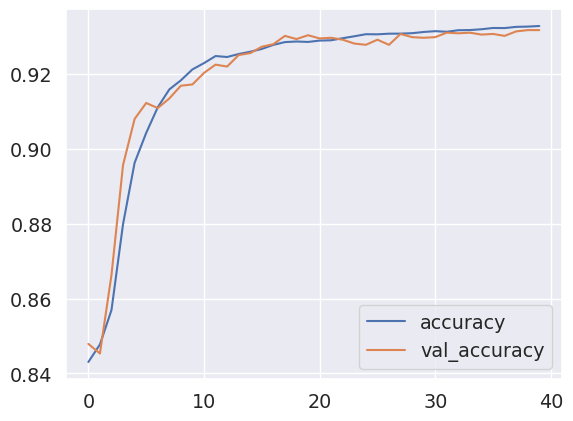

In [83]:
history_seq_def_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

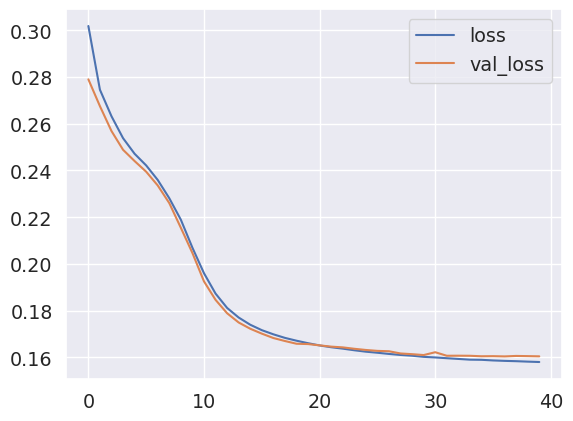

In [84]:
history_seq_def_df[['loss', 'val_loss']].plot()

In [85]:
y_pred_seq_def = model_seq_def.predict(test_final)
y_pred_seq_def = np.where(y_pred_seq_def >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_def))

230/230 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3364
           1       0.94      0.93      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(87.25, 0.5, 'Truth')

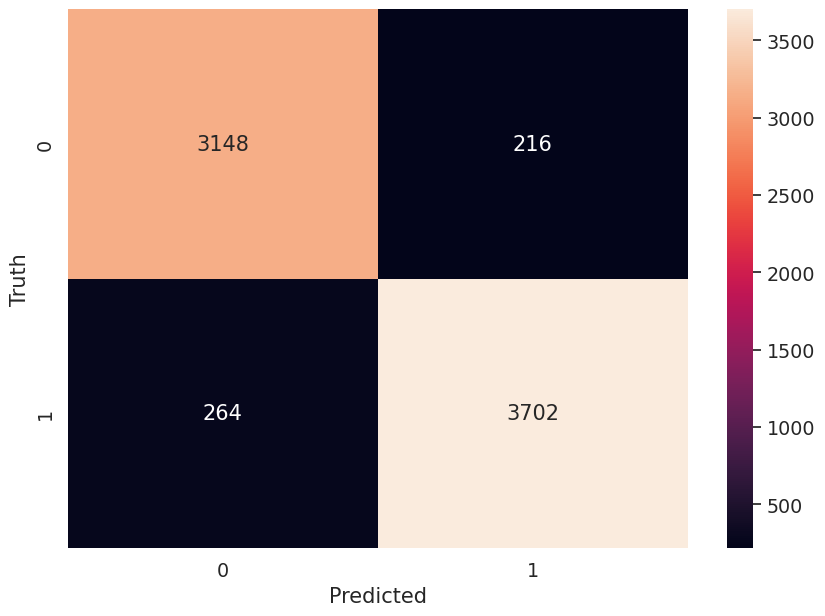

In [86]:
cm_seq_def = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_def)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq_def, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

     0.93      0.92

Analysis : Sequential Default

Based on the 2 lineplots, it can be said that it is goodfit because between train and val the accuracy values are close together as well as 'loss', 'val_loss'.
Based on the classification report, the f1-score for label 1 tends to have a better value (0.94) compared to the f1-score for label 0 (0.92).

# Sequential Tune

In [87]:
history_seq_tune_df = pd.DataFrame(history_seq_tune.history)

<Axes: >

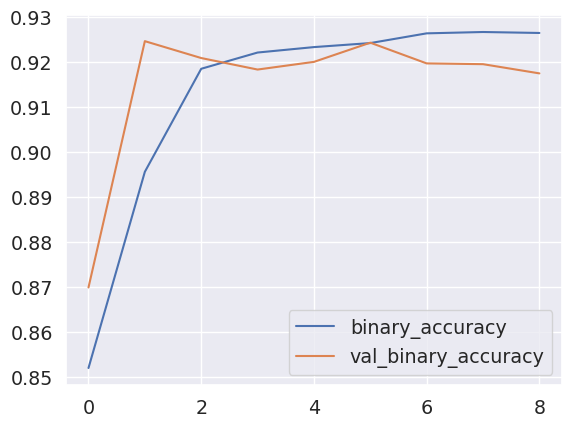

In [88]:
history_seq_tune_df[['binary_accuracy', 'val_binary_accuracy']].plot()

<Axes: >

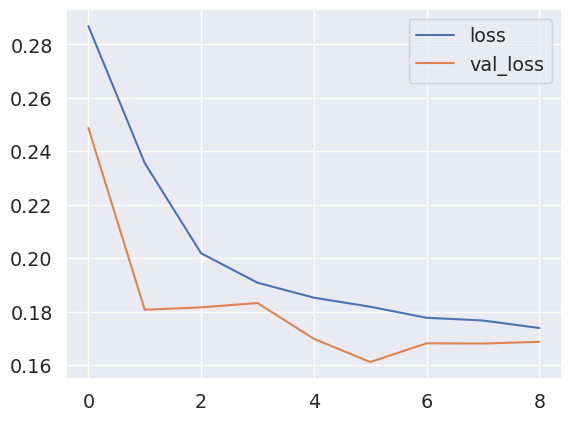

In [89]:
history_seq_tune_df[['loss', 'val_loss']].plot()

In [90]:
y_pred_seq_tune = model_seq_tune.predict(test_final)
y_pred_seq_tune = np.where(y_pred_seq_tune >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_tune))

230/230 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3364
           1       0.92      0.95      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(87.25, 0.5, 'Truth')

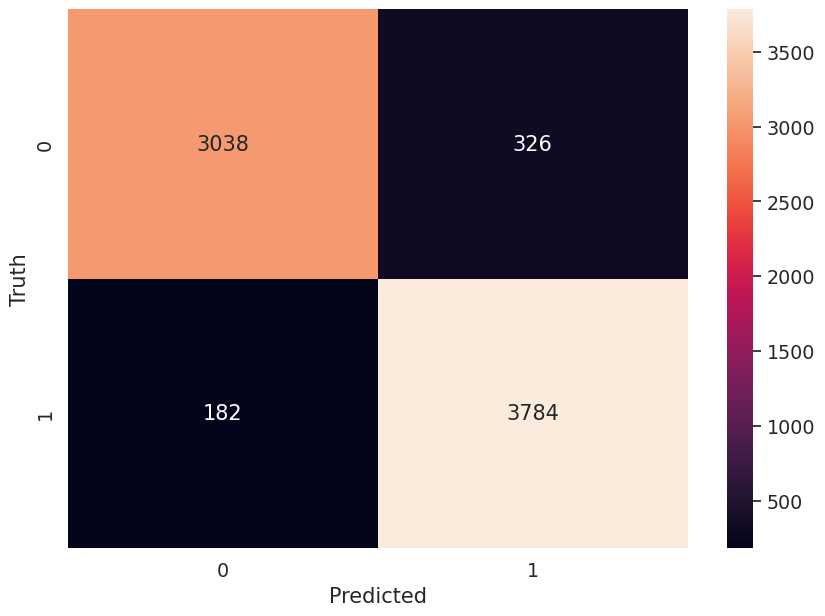

In [91]:
cm_seq_tune = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_tune)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq_tune, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Analysis: Sequential Tune

Based on the 2 lineplots, it can be said that they are goodfit because the accuracy of the values for train and val are close together and for 'loss', 'val_loss' is slightly overfit.
Based on the classification report, the f1-score for label 0 tends to have a better value (0.94) compared to the f1-score for label 1 (0.93).

 # Functional API Default

In [92]:
history_func_def_df = pd.DataFrame(history_func_def.history)

<Axes: >

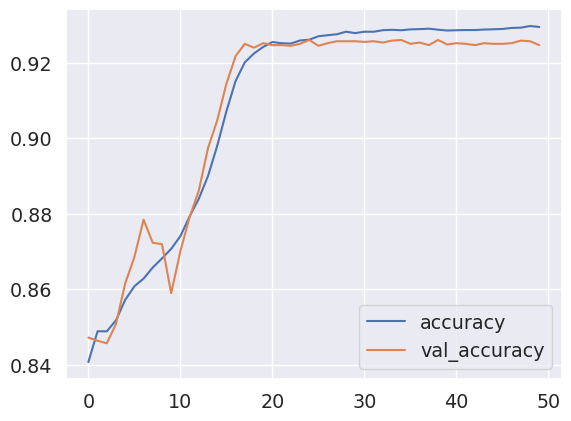

In [93]:
history_func_def_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

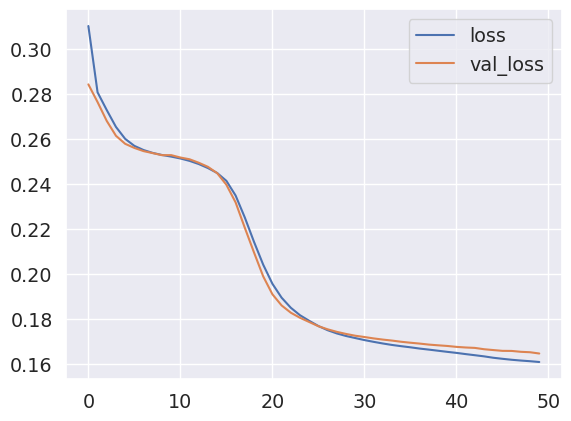

In [94]:
history_func_def_df[['loss', 'val_loss']].plot()

In [95]:
y_pred_func_def = model_func_def.predict(test_final)
y_pred_func_def = np.where(y_pred_func_def >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_def))

230/230 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3364
           1       0.94      0.93      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(87.25, 0.5, 'Truth')

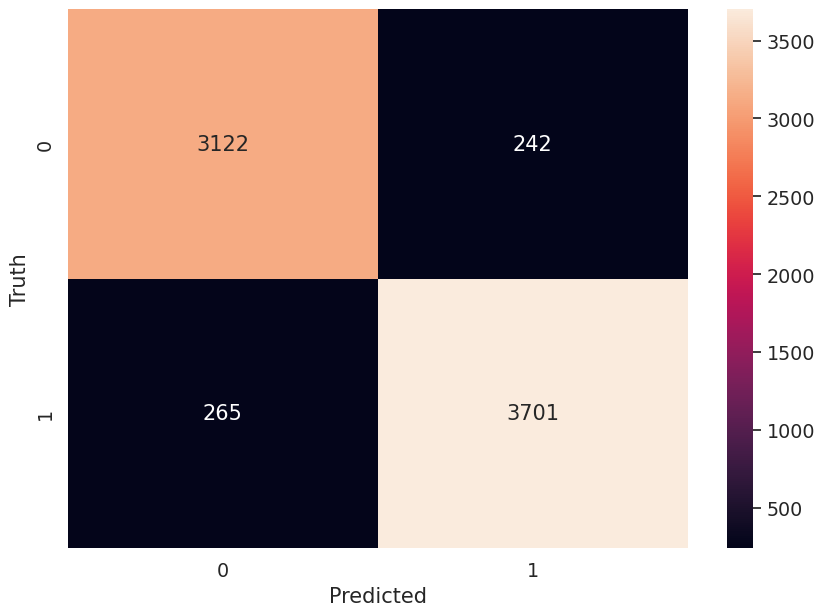

In [96]:
cm_func_def = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_def)
plt.figure(figsize = (10,7))
sns.heatmap(cm_func_def, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Analysis : Functional Defaults

Based on the 2 lineplots, it can be said that it is goodfit because between train and val the accuracy values are close together as well as 'loss', 'val_loss'.
Based on the classification report, the f1-score for label 1 tends to have a better value (0.94) compared to the f1-score for label 0 (0.93).

# Functional API Tune

In [97]:
history_func_tune_df = pd.DataFrame(history_func_tune.history)

<Axes: >

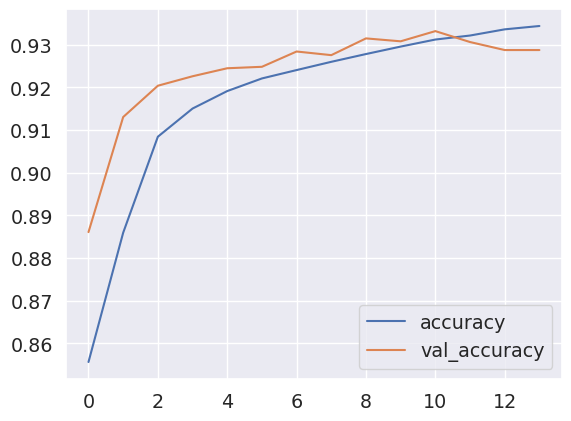

In [98]:
history_func_tune_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

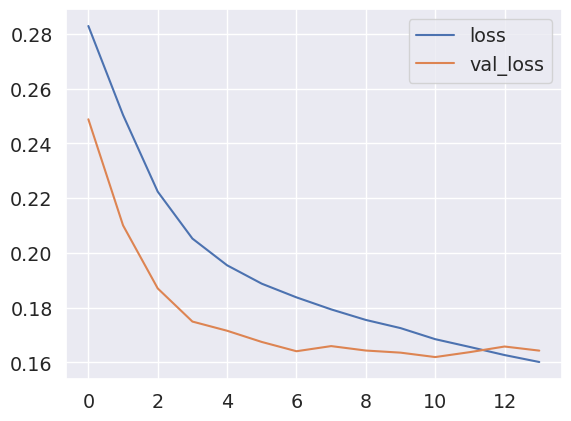

In [99]:
history_func_tune_df[['loss', 'val_loss']].plot()

In [100]:
y_pred_func_tune = model_func_tune.predict(test_final)
y_pred_func_tune = np.where(y_pred_func_tune >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_tune))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3364
           1       0.92      0.95      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(87.25, 0.5, 'Truth')

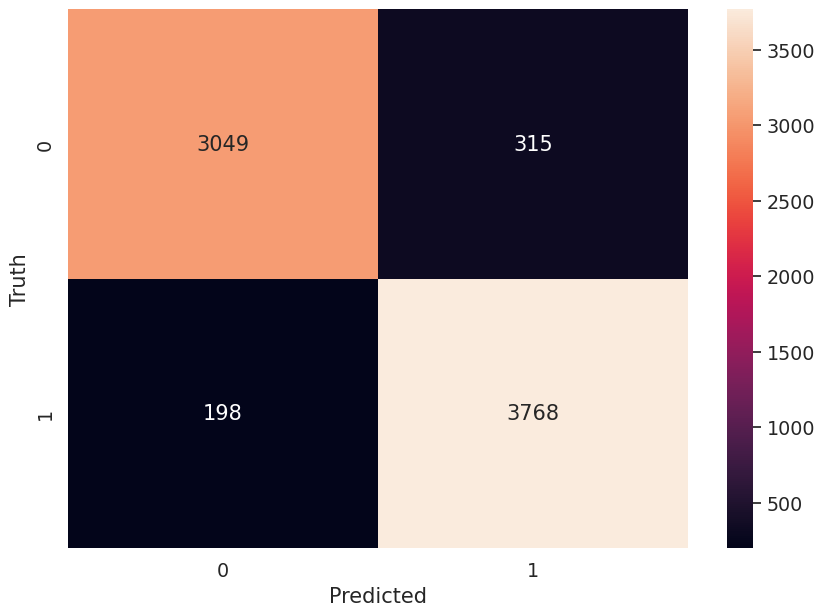

In [101]:
cm_func_tune = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_tune)
plt.figure(figsize = (10,7))
sns.heatmap(cm_func_tune, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Analysis: Functional Tune

Based on the 2 lineplots, it can be said that there is good fit on fault 12 because between train and val the accuracy values are close together as well as 'loss', 'val_loss'.
Based on the classification report, the f1-score for label 1 tends to have a better value (0.94) compared to the f1-score for label 0 (0.93).

# VIII. Model Saving

In [102]:
with open('full_pipeline.pkl', 'wb') as file_1:
  joblib.dump(full_pipeline, file_1)

In [103]:
model_func_tune.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_11 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_4 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_5 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 180)               0   

In [104]:
# Freeze Model
model_func_tune.trainable = False
model_func_tune.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_11 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_4 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_5 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 180)               0   

In [105]:
#save ann model Functional API
model_func_tune.save('model_func_tune.h5')

# X. Conclusion

## Model analysis
In prediction model analysis using sequential and functional models with each model being tuned.

* In determining the number of neurons in the hidden layer by using the Hecht-Nielsen formula which is referred to as "the rule of thumb" or a rule of thumb.
Determination of the number of neurons in the hidden layer

Nh=Ns(α∗(Ni+No))

𝑁𝑖 = number of input neurons.

𝑁𝑜 = number of output neurons.

𝑁𝑠 = number of samples in training data set.

𝛼 = an arbitrary scaling factor usually 2-10.

**Sequential API**
* Based on the results of a comparison between the Sequential Default and Sequential Tune models, the Improved model against the tuned model, there has been an improvement in several ways, namely:

   * Default -> Tune Improve
   * total time = 2min 23s -> 1min 37s (improve)
   * loss = 0.1762 -> 0.1740 (improved)
   * val loss = 0.427 -> 0.1658 (improve)
   * binary accuracy = 0.9269 -> 0.9269 (same accuracy)
   * val_binary_accuracy = 0.9280 -> 0.9262 (decrease but very slight)

from the prediction results it can be concluded that it succeeded in perfecting the model in terms of total time, loss, val loss.

**Functional API**
* Based on the results of a comparison between the Functional Default model and the Functional Tune, the Improved model to the model that has been tuned, there has been an increase in several respects, namely:

* Default -> Tune Improve
* total time = 2min 23s -> 2min 50s (almost the same)
* loss = 0.1762 -> 0.1740 (improved)
* val loss = 0.427 -> 0.161 (improve)
* binary accuracy = 0.9269 -> 0.9377 (improved)
* val_accuracy = 0.9313 -> 0.9337 (improved)

From the prediction results it can be concluded that the model was successful in terms of loss, val loss binary accuracy and val accuracy.

* The parameters used for the sequential tune model are
   * activation='relu': Activation function is a mathematical function that is applied to each neuron in a layer in an artificial neural network.
   * kernel_initializer='he_uniform': This parameter is a parameter to initialize the weight or kernel on the layer. This parameter is used to provide an initial or 'initial' value to the weight adjusted to the characteristics of the data.
   * bias_initializer='Zeros': This parameter is used to initialize the bias of each neuron in the layer. 'Zeros' is a simple and frequently used initialization method to initialize bias with a value of zero. This is done to give an initial value to the bias so that the learning process can run more effectively.
   * BatchNormalization(): Batch normalization is a technique to increase the learning speed and stability of neural networks by normalizing the input values in each batch of data. This technique is used to avoid problems such as vanishing gradients and overfitting of neural networks.
   * The dropout layer is used as a regularization technique in artificial neural networks. The purpose of the regularization technique is to avoid overfitting the model. Overfitting occurs when the model is too complex to generalize well to data it has never seen before.
* A layer dropout with a value of 0.1 is used after two hidden layers (on layers). This aims to reduce the complexity of the model and prevent overfitting of the model. With a dropout of 0.1, 10% of the units in the previous layer are randomly disabled during training.

* Reference:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
* Reference: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


## Overall Analysis

* From the prediction results it can be concluded that the success of perfecting the model with accuracy on Sequential tune: 92% and Funtional Tune: 93%
* The model can predict very well.
* Models can still be upgraded due to several factors such as:
     * can add important Parameters to HyperParameter Tuning so that it can produce more optimal predictions.

## Business Conclusion

* It can be seen from the EDA above that the average customer transaction value tends to increase over time, from 2015 to 2017. This indicates that customers are becoming more active in making transactions and may be more loyal to the business. This can be a positive signal for a business to retain existing customers and attract new ones by offering attractive services or products.

* The majority of customers give "dissatisfied" or "neutral" feedback on the company's services (poor quality, too many ads, etc.). This needs to be considered by the company to improve service quality in order to increase customer satisfaction.

* In this case it is recommended to focus on customer satisfaction: To maintain customer satisfaction, companies need to ensure that the products and services offered are in accordance with customer needs and expectations. In conditions where the number of customer churn and non-churn is balanced, companies still need to pay attention to product or service quality, ensure customer retention, increase customer satisfaction, and increase customer loyalty to maintain healthy business growth.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')